## Nadgledano učenje

Učenje iz podataka uz pomoć unapred definisanih oznaka. 

Primeri: 
* Klasifikacija
* Regresija

Pristup: 
1. Prikupljanje skupa podataka
2. Mašinsko učenje - treniranje modela (trening skup)
3. Evaluacija modela na <b>novim</b> primerima (testni skup)

---

# KNN (K najbližih komšija)

Modifikacija Nearest Neighbor algoritma.

### Nearest Neighbor pristup

U celom skupu podataka, nađi najsličniju observaciju.

### KNN pristup

Umesto da pronađeš samo jednu najsličniju observaciju, pronađi K takvih, i iskombinuj informacije prilikom predikcije. 

Za razliku od neuronskih mreža, ili linearnih modela, KNN "uči" samo na osnovu skupa podataka koji su mu dostupni.

Problem sa kojim smo suočeni jeste: Na koji način pronaći "najsličniju" observaciju. (Manhattan udaljenost, Euclid...)

Pseudo-kod:

```
zapamti trening podatke
za svaki primer iz testnog skupa
    pronađi najbližih K elemenata iz trening skupa
    za svaku jedinstvenu klasu među tih K suseda, prebroj koliko puta se ponavlja
    klasa sa najviše ponavljanja postaje ciljna klasa za primer iz testnog skupa
```
![img/KNN.png](img/KNN.png)

Prednosti: jednostavan, efikasan za male skupove podataka

Mane: neefikasan za velike skupove, loš za visoko-dimenzionalne probleme, memorijski zahtevan

---

## KNN u python-u

In [1]:
import numpy as np

class KNearestNeighborsClassifier():
    def __init__(self, k=1):
        self.k = k # Ukoliko ne prosledimo drugačiju vrednost, ovo je NN
    
    def fit(self, X, y):
        # Treniranje u KNN se svodi na čuvanje celog skupa
        self.X = X
        self.y = y # Labelirani podaci

    def predict(self, X):
        num_test = X.shape[0] # Broj elemenata za koje želimo da pogodimo klasu

        Y_pred = np.zeros(num_test)

        for i in range(num_test):
            # Racunanje distance posmatranog elementa, naspram svih elemenata u skupu
            distances = np.sum(np.abs(self.X - X[i, :]), axis=1)
            # Pronalazenje K najbližih
            k_indices = np.argsort(distances)[:self.k]

            closest_y = self.y[k_indices]
            unique, counts = np.unique(closest_y, return_counts=True)
            # Biramo onu klasu koja se najviše ponavlja u okolini
            Y_pred[i] = unique[np.argmax(counts)]
            

        return Y_pred 

In [2]:
# Primer upotrebe
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y_train = np.array([0, 1, 0, 1])

classifier = KNearestNeighborsClassifier()

# Treniranje
classifier.fit(X_train, y_train)

# Testni podaci
X_test = np.array([[2, 3], [6.75, 7.5]])

predictions = classifier.predict(X_test)
print("Predictions:", predictions)

Predictions: [0. 1.]


Cilj narednog primera je da za dobijenu sliku na ulazu, na izlazu dobijemo broj koji se nalazi na slici.

Accuracy: 0.9833333333333333


(-0.5, 7.5, 7.5, -0.5)

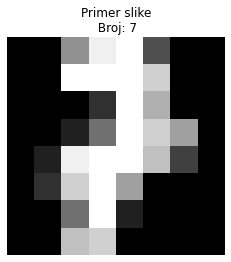

In [3]:
# Na malo kompleksnijim podacima

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# U nastavku koristimo implementaciju iz biblioteke
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dataset = load_digits()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Računanje preciznosti
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Random primer iz trening skupa za potrebe vizualizacije
random_index = np.random.randint(len(X_train))
random_image = X_train[random_index].reshape(8, 8)
random_label = y_train[random_index]
plt.figure(figsize=(4, 4))
plt.imshow(random_image, cmap='gray')
plt.title(f"Primer slike\n Broj: {random_label}")
plt.axis('off')


# Klasterovanje

Klasterovanje je tip nenadgledanog učenja koji se koristi za grupisanje međusobno sličnih podataka.

Često se koristi za redukciju dimenzionalnosti i detekciju autlajera.

---

## Nenadgledano učenje

Učenje funkcije koja opisuje "skrivenu" strukturu neobeleženih podataka, odnosno učenje reprezentacije podataka na osnovu primera *x* (nema *y*). Nenadgledano učenje može biti korisno za pronalaženje interesantnih veza među podacima. Ne postoji neki standardni način merenja performansi. Postupci se dele na:
* Klasterizacija/klasterovanje (*eng. clustering*) - grupisanje podataka na osnovu sličnosti
* Analiza komponenti (*eng. component analysis*) - otkrivanje najdeskriptivnijih osobina podataka
* Asocijativna pravila (*eng. association rules*) - pronalaženje uobičajenih kombinacija osobina podataka

---


### K-means

Jedan od najčešće korišćenih algoritama za nenadgledano klasterovanje podataka. Preciznije, k-means je ne-hijerarhijska metoda grupisanja sličnih podataka. K-means je tehnika koja se često koristi u tzv. *eksplorativnoj analizi podataka*.

Klasterizacija je zadatak grupisanja skupa objekata, tako da su objekti koji su u istoj grupi (odnosno *klasteru*) sličniji (u nekom smislu) jedni drugima, više nego što su slični objektima u drugim grupama (klasterima).

Pseudo-kod:

```
za svaku grupu inicijalizovati nasumično centar
dok se centri ne prestanu kretati ili ne dostigne max broj iteracija:
    pridruži svaki element grupi sa njemu najbližim centrom grupe
    pomeri centar svih grupa na osnovu novih elemenata
```

![img/kmeans.gif](img/kmeans.gif)

Za računanje distance se najčešće koristi euklidsko rastojanje.

Kako se centri inicijalizuju nasumično, K-means je stohastički algoritam.

---

## KMeans u python-u

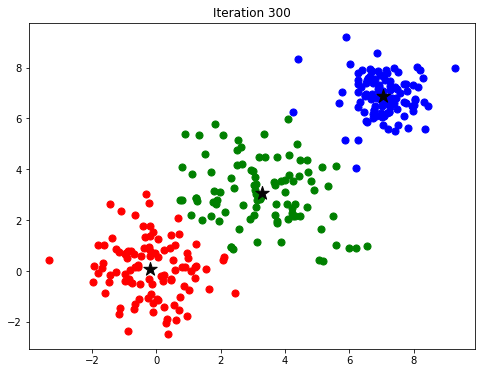

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-10, kmeans_pp=False, plot_iters=True, plot_finish=True):
        self.n_clusters = n_clusters # broj klastera
        self.max_iter = max_iter # maksimalan broj iteracija koji puštamo da se izvrši
        self.tol = tol  # tolerancija za zaustavljanje
        self.kmeans_pp = kmeans_pp # nacin inicijalizacije centroida k++ ili random

        self.plot_iters = plot_iters
        self.plot_finish = plot_finish

    def fit(self, X):
        if self.kmeans_pp: # biramo nacin inicijalizacije, k++
            self.centroids = self.kmeans_pp_init(X, self.n_clusters) # k++
        else: # random
            np.random.seed(42)
            self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        

        for i in range(self.max_iter): # dok se ne dostigne maksimalan broj iteracija
            old_centroids = np.copy(self.centroids)
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            cluster_labels = np.argmin(distances, axis=0)
            for j in range(self.n_clusters):
                self.centroids[j] = X[cluster_labels == j].mean(axis=0)
            
            # DEO ZA ISCRTAVANJE
            if self.plot_iters:
                self.plot_clusters(X, self.centroids, i)
                time.sleep(5) # promeniti za brzinu iscrtavanja

            if np.allclose(old_centroids, self.centroids, rtol=0, atol=self.tol): # ili dok se centri ne prestanu pretati
                break
            else: # DEO NEVEZAN ZA KMEANS -> KAKO NE BISMO ZATRPALI NOTEBOOK PLOTOVIMA
                if self.plot_iters:
                    clear_output(wait=True)

        if self.plot_finish:
            self.plot_clusters(X, self.centroids, self.max_iter)

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)) # euklidska udaljenost za N dimenzija
        cluster_labels = np.argmin(distances, axis=0) # nalazimo minimalne udaljenosti
        return cluster_labels
    
    def plot_clusters(self, X, centroids, iteration):
        cluster_labels = self.predict(X)
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        plt.figure(figsize=(8, 6))
        for i in range(self.n_clusters):
            plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=50, c=colors[i])
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
        plt.title('Iteration {}'.format(iteration))
        plt.show(block=False)
        plt.close()
    
    # k++ tezi da izabere centroide koji su udaljeniji jedan od drugog  
    def kmeans_pp_init(self, X, k):
        centroids = np.empty((k, X.shape[1]))
        centroids[0] = X[np.random.choice(len(X))]
        for i in range(1, k):
            distances = np.array([min([np.linalg.norm(x-c)**2 for c in centroids[:i]]) for x in X])
            probs = distances / distances.sum()
            centroids[i] = X[np.random.choice(len(X), p=probs)]
        return centroids

np.random.seed(42)
X = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)), # menjanjem loc i scale lako dobijamo drugacije klastere
                     np.random.normal(loc=3, scale=1.5, size=(100, 2)),
                     np.random.normal(loc=7, scale=.5, size=(100, 2))])

noise = np.random.normal(loc=0, scale=.5, size=X.shape) # dodajemo sum na podatke
X_noisy = X + noise

kmeans = KMeans(n_clusters=3, plot_iters=False, kmeans_pp=True) # initialize KMeans object
kmeans.fit(X_noisy) # train the model on the data
labels = kmeans.predict(X_noisy) # predict the labels for the data
print(labels)



Za demonstraciju koristimo implementaciju [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) iz biblioteke scikit-learn.

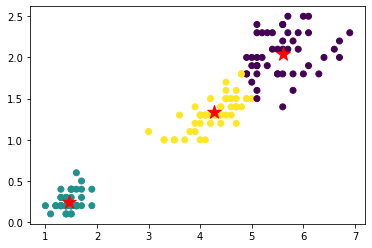

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Učitavanje dataset-a
iris = load_iris()

# Od obeležja biramo petal length and petal width
X = iris.data[:, [2, 3]]

# Kreiramo k-means model sa 3 klastera
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

# Kao rezultat dobijamo niz
# Taj niz je reprezentacija kom klasteru pripada element iz dataset-a
labels = kmeans.labels_

# Dobavljamo centroide za iscrtavanje
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.show()

#### Određivanje optimalnog K

Kako znati unapred koliko ima klastera?

Lako je videti kada su podaci dvodimenzionalni, jer ih je onda lako i vizualizovati, ali često podaci imaju (mnogo) više od samo 2 dimenzije - ovo je tzv. "kletva dimenzionalnosti" (*eng. curse of dimensionality*) u mašinskom učenju.

Određivanje optimalnog K (tj. broja klastera) je nešto se dosta proučavalo, a mi ćemo koristi tzv. "metodu lakta" (*eng. elbow method*). Za određen broj K (npr. 2, 4, 6, 8, ..., 20) se vrši klasterizacija i zatim se računa suma kvadratnih grešaka (SSE). SSE se računa tako što se unutar svakog klastera sumiraju kvadrati udaljenosti podataka od centra klastera, i zatim se sve to opet sumira. Matematički:

$ SSE = \sum_{i=1}^{K} \sum_{x \in c_{i}} dist(x, c_{i})^{2} $, gde je *dist* euklidska udaljnost.

Zatim se za sve plotuje SSE u odnosu na K, npr.:

![img/sse.png](img/sse.png)



#### Prednosti K-means

* Jednostavan i lako razumljiv
* Laka implementacija
* Relativno dobre performanse (za malo K)
* Odličan kada su klasteri sferičnog/globularnog oblika (malo formalnije hiper-sferičnog, za sfere u >3 dimenzija)

#### Mane K-means
* Potrebno unapred znati K (što je nekad teško odrediti)
* Nije deterministički - pošto se centri inicijalizuju nasumično, nekad se dobijaju drugačiji rezultati
* Osetljiv na šum
* Kada podaci nisu globularnog oblika -> beskoristan (pogledati donju sliku)
* Nema mogućnost hijerarhijskog klasterovanja (razlikovanje više manjih podklastera unutar većeg klastera)

![img/kmeans_fail.png](img/kmeans_fail.png)

---

### DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise) je takođe algoritam za klasterizaciju podataka. Ovaj postupak se zasniva na ideji grupisanja tačaka (podataka) na osnovu njihove međusobne udaljenosti. Ukoliko se tačke nalaze u tzv. *epsilon okolini* one su deo nekog klastera, u suprotnom se posmatraju kao šum.

Iako predstavljen još 1996. godine, 2014. godine na jednoj od najprestižnijih konferencija (KDD), DBSCAN je nagrađen nagradom "testa vremena", kao jedan od najviše citiranih algoritama sa ogromnom upotrebom, kako u teoriji tako i u praksi.


Opis DBSCAN algoritma:
1. Neka postoji neki skup tačaka (podataka) koje želimo da klasterizujemo. U samom postupku, razlikuju se tri vrste tačaka: ključne tačke, dostupne tačke i šum.
2. DBSCAN zahteva dva parametra: *epsilon* (eps) i *minimalni broj potrebnih tačaka koje čine region* (minPts). Epsilon okolina se najčešće računa korišćenjem euklidske udaljenosti.
3. Algoritam počinje sa proizvoljnom tačkom. Računa se epsilon okolina te tačke, i ukoliko se u njoj nalazi dovoljno tačaka (minPts), započinje se novi klaster. U suprotnom, tačka se računa kao šum. Obratiti pažnju da tačka, iako je šum, kasnije *može* biti pronađena kao deo neke druge epsilon okoline sa dovoljno tačaka i samim tim da postane deo klastera.
4. Ukoliko je za tačku određeno da pripada klasteru, sve tačke u njenoj epsilon okolini takođe pripadaju tom klasteru. Dakle, sve tačke koje su pronađene u epsilon okolini trenutne tačke se dodaju u klaster, kao i tačke koje se nalaze u epsilon okolini tih tačaka (rekurzivno). Proces se nastavlja dok se ne nađe ceo klaster, odnosno dok se ne obiđu sve tačke u epsilon okolinama. 
5. Onda se nalazi nova, prozivoljna neposećena tačka, za koju se ponavlja čitav postupak, što dovodi do otkrivanja ili novog klastera ili šuma.

![img/dbscan.png](img/dbscan.png)

Hajde da vidimo rezultat DB scan-a naspram KMeans, na sintetički generisanom skupu:

---

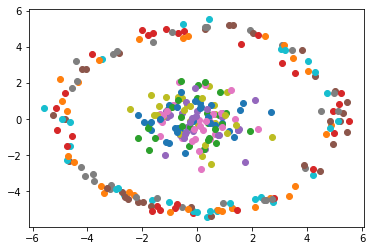

In [5]:
import numpy as np

np.random.seed(1337)

n = 150

s1 = np.ndarray(shape=(n, 2))
s2 = np.ndarray(shape=(n, 4))

data = []  # ovde se nalaze podaci, u vidu liste tacaka sa (x,y) koordinatama

plt.figure()

for i in range(n):
    x1, y1 = np.random.normal(), np.random.normal()
    s1[i] = (x1, y1)

    r2, theta2 = np.random.normal(5, 0.25), np.random.uniform(0, 2*np.pi)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)
    s2[i] = (x2, y2, r2, theta2)

    plt.scatter(x1, y1)
    plt.scatter(x2, y2)

    data.append((x1, y1))
    data.append((x2, y2))

plt.show()

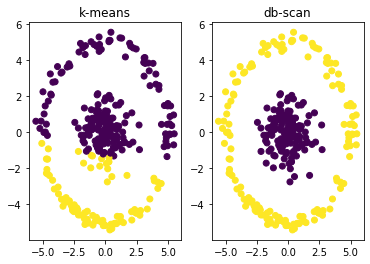

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels_kmeans = kmeans.labels_


dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data)
labels_dbscan = dbscan.labels_

x_scatter = [point[0] for point in data]
y_scatter = [point[1] for point in data]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(x_scatter, y_scatter, c=labels_kmeans)
plt.title('k-means')

plt.subplot(1, 2, 2)
plt.scatter(x_scatter, y_scatter, c=labels_dbscan)
plt.title('db-scan')
plt.show()


#### Prednosti DBSCAN

* Nije potrebno unapred znati broj klastera (kao kod K-means)
* Klasteri mogu biti proizvoljnog oblika
* Ume da tretira šum
* Parametre epsilon i minPts je lako menjati u cilju dobijanja klastera različitih veličina i oblika, i ove parametre često podešavaju eksperti sa domenskim znanjem


#### Mane DBSCAN

* Kvalitet rezultata zavisi od toga čime se meri epsilon. Obično je to euklidska udaljenost, ali za višedimenzionalne podatke potrebne su drugačije metrike
* Kada postoje varijacije u gustini klastera, nemoguće je odrediti epsilon i minPts da odgovara svim klasterima
* U slučaju kada ne postoji ekspert sa domenskim znanjem, određivanje epsilon i minPts parametara je često dosta teško

---

## Zadaci

1. Izvršiti klasterizaciju u cilju eksplorative analize podataka nad bankovnim podacima ```data/bank.csv```.
2. Detektovati autlajere iz iris dataset-a upotrebom DBSCAN algoritma.

### Dodatni zadaci

1. Izvršiti kompresiju slike, redukcijom boja, pomoću KMeans algoritma.

## Rešenje

## 1.

          id  age     sex      region    income married  children  car  \
0    ID12101   48  FEMALE  INNER_CITY  17546.00      NO         1   NO   
1    ID12102   40    MALE        TOWN  30085.10     YES         3  YES   
2    ID12103   51  FEMALE  INNER_CITY  16575.40     YES         0  YES   
3    ID12104   23  FEMALE        TOWN  20375.40     YES         3   NO   
4    ID12105   57  FEMALE       RURAL  50576.30     YES         0   NO   
..       ...  ...     ...         ...       ...     ...       ...  ...   
595  ID12696   61  FEMALE  INNER_CITY  47025.00      NO         2  YES   
596  ID12697   30  FEMALE  INNER_CITY   9672.25     YES         0  YES   
597  ID12698   31  FEMALE        TOWN  15976.30     YES         0  YES   
598  ID12699   29    MALE  INNER_CITY  14711.80     YES         0   NO   
599  ID12700   38    MALE        TOWN  26671.60      NO         0  YES   

    save_act current_act mortgage  pep  
0         NO          NO       NO  YES  
1         NO         YES     

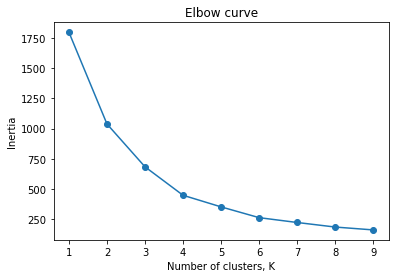

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('bank.csv')
print(data)
# Transformisanje kategoričkih obeležja
categorical_cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'pep']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Odabir kolona koje koristimo za klasterovanje
X = data[['age', 'income', 'pep']]

# Normalizacija numeričkih obeležja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sses = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    sses.append(model.inertia_)

# Crtanje elbow curve
plt.plot(range(1, 10), sses, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

labels = kmeans.labels_

data['cluster'] = labels

print(data['cluster'].value_counts())

1    250
0    200
2    150
Name: cluster, dtype: int64


In [10]:
# Upiši kom klasteru pripada jedno posmatranje
data['cluster'] = kmeans.labels_

# Sačuvaj novi csv
data.to_csv('bank_output_file.csv', index=False)

## 2.

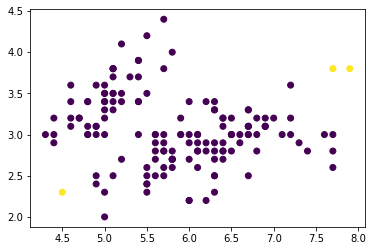

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [0, 1]]

dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_

outliers = dbscan.labels_ == -1

plt.scatter(X[:, 0], X[:, 1], c=outliers)
plt.show()

## 3.

In [12]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

image = Image.open('image.jpg')

X = np.array(image)

X = X.reshape(-1, 3)

kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = X_compressed.reshape(image.size[1], image.size[0], 3)

image_compressed = Image.fromarray(np.uint8(X_compressed))
image_compressed.save('image_compressed.jpg')

# Klasifikacija

Klasikacija je zadatak u kom je cilj svakom podatku dodeliti jednu od predefinsanih klasa. U mašinskom učenju, dat nam je podatak, a algoritam treba da pridruži podatak odgovarajućoj klasi.
Klasifikacija je uspešna ako je algoritam 'dobro' naučio koji podatak pripada kojoj klasi.

Tipovi klasifikacije:
- binarna klasifikacija (*binary*) - svaki podatak se dodeljuje tačno jednoj od dve klase - primer: ulaz je slika, a izlaz jedna od klasa (mačka, pas).
- višeklasna klasifikacija (*multi-class*) - svaki podatak se dodeljuje tačno jednoj od više klasa - primer: ulaz je slika, a izlaz jedna od klasa (mačka, pas, slon, kengur, koala).

- klasifikacija sa više oznaka (*multi-label*) - svaki podatak se dodeljuje tačno jednoj od više klasa - primer: ulaz je tekst novinskog članka, a izlaz je jedna ili više klasa (biznis, politika, moda, automobili, putovanja,... )


Da izmerimo koliko 'dobro' algoritam radi, treba nam neka metrika. Često koristimo tačnost (*accuracy*) kao metriku - koliko puno često podatku dodelili dobru klasu?
Primer: ulaz je slika, a izlaz je jedna od klasa (mačka, pas). Ako smo od ukupno 100 slika, ispravno dodelili klasu za 80 slika, tada kažemo da je tačnost 80%. 

Tačnost je česta metrika, ali nije uvek pogodna za dati problem (npr. šta kada imamo 98 slika mačaka i samo 2 slike psa?). Tada koristimo alternative poput F1 metrike.

---

# Naivni Bajes
<p>
<img style="float:right; max-width:400px" src="imgs/spam filter.gif" width="40%" />

Naivni Bajes (*Naive Bayes*) je jedan od najpoznatijih klasifikacionih algoritama u ML.

Ulaz u algoritam je podatak, a izlaz je neka klasa (npr. spam ili nije spam).
Cilj algoritma je da izračuna verovatnoću da neki podatak pripada nekoj klasi (npr. verovatnoća da li je mejl spam je 91%, a da nije spam 9%).
Naivni Bajes se često koristi u klasifikaciji teksta, što ćemo i prikazati u nastavku.

Spada u algoritme nadgedanog učenja. Nadgledano učenje znači da obučavamo model tako što na ulaz algoritma dovedemo *gomilu* podataka i odgovarajuće klase. Za svaki podatak se tačno zna kojoj klasi pripada. Algoritam uči iz podataka.

Algoritam se zove *naivni* jer pretpostavlja da su osobine međusobno **nezavisne** u odnosu na ciljnu klasu.
Naivni Bajes se zasniva na Bajesovoj teoremi.
</p>

## Bajesova teorema
Opisuje verovatnoću nekog događaja na osnovu drugih događaja koji ga uslovljavaju.
$$ P(A|B) = {P(A) P(B|A)  \over P(B)} $$

- $P(A)$ i $P(B)$ su verovatnoće događaja $A$ i $B$. 
- $P(A|B)$ je verovatnoća događaja A, ako se desio događaj B
- $P(B|A)$ je verovatnoća događaja B, ako se desio događaj A
- U literaturi se često nalaze oznake $H$ i $E$ umesto $A$ i $B$, gde je $H$ je skraćeno od *Hypothesis*, a $E$ je skraćeno od *Evidence*.

*Komentar: Bajesova teorema ne pretpostavlja nezavisnost događaja A i B, za razliku od Naivnog Bajesa.*

## Ilustartivni primer: Vremenska prognoza
<p>
<img style="float:right; max-width:300px" src="imgs/weather-icon.webp" width="40%" />

Želimo da procenimo verovatnoću da će danas padati kiša na osnovu podataka vremenske prognoze.

*Napomena: Prognoza je prosta i razlikuje samo 2 stanja: 1. kišne i 2. sunčane dane. Nema snega, oblaka itd.*

Danas želimo da odemo u šetnju, ali ne znamo da li će padati kiša i da li nam treba kišobran?
Pogledamo sajt vremenske prognoze gde piše da će danas padati kiša. Na sajtu prognoze tvrde da su 90% tačni: od 10 kišnih dana, predvideli su 9 kišnih dana. 
Takođe tvrde da su 80% tačni kada predviđaju sunčane dane. Izgleda da je vremenska prognoza prilično pouzadana.

**Da li to znači da je verovatnoća da će danas padati kiša = 90%?** 

**Da li treba da ponesemo kišobran u šetnju?**

Izgleda da je vremenska prognoza prilično pouzdana, pa odlučimo da ćemo danas da prošetamo sa kišobranom. Ispostavi se da je ceo dan bio sunčan! ☀️ 

### Zašto smo promašili u proceni?
Promašili smo u proceni jer nismo sve sagledali: nismo uzeli u obzir činjenicu da **ima mnogo više sunčanih dana!**

Zaključak je da nam treba nam još informacija za tačnu procenu.
Iz [skupa podataka](forecast.csv) vidimo da imamo podatke za prethodnih 100 dana:

- Od ukupno 100 dana, ima samo 10 kišnih dana.
- Od ukupno 100 dana, ima čak  90 sunčanih dana (Na 9 sunčanih dana, dođe tek 1 kišni dan).
- Od tih 10 kišnih dana (levo na slici), prognoza je pogodila 9 puta, a 1 put promašila (jednom je prognoza predvidela kišu, kada je zapravo sijalo sunce).
- Od 90 sunčanih dana, prognoza je 18 puta promašila (predvidela kišu, kada je zapravo sijalo sunce), a 72 puta je pogodila.

<div style="text-align:center">
<img src="imgs/forecast 1.png" style='width:90%; max-width:50rem'/>
</div>

### $P(kiša | prognoza \ predvidi \ kišu) = ?$
Mi znamo da je prognoza predviđa kišu za danas. Znamo i da je prognoza pogodila 9 od 10 kišnih dana, tj. 90%.

Formalnije zapisano: $P(prognoza \ predvidi \ kišu | kiša ) = 90 \%$

**Ako je prognoza predvidela danas kišu, ne znači da je verovatnoća za kišu = 90%!**

**$P(kiša | prognoza \ predvidi \ kišu)$ nije isto što i $P(prognoza \ predvidi \ kišu | kiša) = 90\%$!**
 
- Označimo sa *H (Hypothesis)* da stvarno pada kiša. Označimo sa *E (Evidence)* da prognoza predviđa kišu.
- Pitamo se $ P(H|E) = ? \%$
- Znamo da je prognoza od 10 kišnih dana uspešno pogodila 9, pa je $P(E|H) = 90\%$. 
- Obratite paznju da $P(E|H)$ i $P(H|E)$ nisu iste stvari.
- Znamo da je prognoza pogodila sunčan dan 72 puta od 90 dana, pa je $ P(\neg E|\neg H) = 80\% $.
- Znamo da je prognoza promašila sunčan dan 18 puta od 90 dana, pa je $ P(E|\neg H) = 20\% $.

#### Kako da izračunamo $P(H|E)$? 

Setimo se Bajesove formule: 
$P(H|E) = {P(H) P(E|H)  \over P(E)}$

Vidmo da nam fali: 
1. $P(H)$ - verovatnoća da pada kiša. - Od 100 dana koliko je bilo kišnih dana? Vidimo da ima samo 10 kišnih dana, pa je $P(H) = 10\%$.
2. $P(E)$ - verovatnoća da je prognoza predvidela da pada kiša. - Od 100 dana koliko je puta prognoza rekla da pada kiša? Tu se računa i kada prognoza tačno predvidi kišu, ali i kada pogreši (predvidi kišu, a zapravo sija sunce). Vidimo da je prognoza predvidela kišu 9 + 18 = 27 puta, pa je $P(E) = 27\%$.

Dobijene vrednosti uvrstimo u Bajesovu formulu i dobijamo:
$$P(H|E) = {P(H) P(E|H)  \over P(E)} = {10\% * 90\%  \over 27\%} = 33\% $$

<p style="color:salmon; font-weight:bold"> Ispada da je verovatnoća da pada kiša, ako prognoza predvidi kišu samo 33%. Razlog je što ima mnogo više sunčanih dana od kišnih dana.</p>
Pokazali smo da prethodna statistika kojom se vremenska prognoza hvali i nije baš toliko impresivna :)
<div style="text-align:center">
<img src="imgs/forecast 2.png" style='width:90%; max-width:50rem'/>
</div>

Da rezimiramo:
- $H$ - stvarno pada kiša, $E$ - prognoza predviđa kišu
- $ P(H) = 10 \% $ - 10 kišnih dana od ukupno 100 dana
- $ P(E) = 27\% $ prognoza je predvidela kišu 27 dana od ukupno 100 dana. Tu se računa i kada prognoza tačno predvidi kišu, ali i kada pogreši (predvidi kišu, a zapravo sija sunce).
- $ P(E|H) = 90\% $ -  od 10 kišnih dana, prognoza je predvidela 9 kišnih dana
- $P(H|E) = {P(H) P(E|H)  \over P(E)} = {10\% * 90\%  \over 27\%} = 33\% $


### Naivni Bajes klasifikator u kodu
Učimo NB klasifikator da predvidi verovatnoću da pada kiša, ako prognoza kaže da danas pada kiša. Želimo u kodu da dobijemo iste rezultate koje smo matematički izračunali koristeći Bajesovu formulu.

Kako da naučimo klasifikator da zna da je baš 33% verovatnoća da pada kiša, ako je kišni dan?
Klasifikator učimo tako što:
1. prosledimo [podatke](forecast.csv),
1. pozovemo metodu `fit()`,
1. pozovemo metodu `predict_proba()`.

*Da biste uspešno pokrenuli notebook trebaju vam biblioteke: numpy, pandas, scikit-learn. Instalirajte ih ručno ili izvršite `pip install -r requirements.txt` u konzoli, kako biste instalirali neophodne biblioteke.*

In [1]:
# ------- 1. prosledimo podatke -------
# ucitamo fajl
import pandas as pd
df = pd.read_csv('forecast.csv') 

# klasifikatoru trebaju brojevi, a ne reci 'rainy' i 'sunny' iz skupa podataka
# umesto 'sunny' se piše 0, umesto 'rainy' se piše 1
df['Weather Condition'] = df['Weather Condition'].factorize()[0]
df = pd.get_dummies(df, columns=['Forecast Predicts Rain'])

# niz x koji sadrzi sve osobine (features), a y ciljnu klasu (target)
x = df.drop(columns=['Weather Condition']).values
y = df['Weather Condition'].values

# ------- 2. pozovemo metodu `fit()` -------
# ------- obučimo klasifikator -------------
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.5)
clf.fit(x, y)

# --- 3. pozovemo metodu `predict_proba()` ---
# Rezultat obučavanja: ako prognoza predvidi kišu, 
# koja je verovatnoća da će pasti kiša? Očekujemo ~ 33% što smo izračunali sa Bajesovom Formulom.
forecast_predicts_rain = [0,1]
p_h_e = clf.predict_proba([forecast_predicts_rain])[0]
print(p_h_e)
print(f'P(sunce| prognoza predvidi kišu) = {p_h_e[0] * 100:.2f}%')
print(f'P(kiša | prognoza predvidi kišu) = {p_h_e[1]*100:.2f}%')

[0.67933976 0.32066024]
P(sunce| prognoza predvidi kišu) = 67.93%
P(kiša | prognoza predvidi kišu) = 32.07%


Vidimo da je $P(H|E)$ oko 33% što smo i očekivali. Konkretna vrednost verovatnoće zavisi od hiper-parametera klasifikatora. (U kasnijim lekcijama će biti više reči o hiper-pametrima).

### Naive Bayes vs Gaussian Naive Bayes

<p>
<img style="float:right; max-width:300px" src="imgs/petal and sepal.jpeg" width="40%" />

Verdnosti mogu biti diskretne ili kontinualne.
Do sada smo radili sa diskretnim vrednostima: vreme je bilo: **kišno** ili **sunčano**. Prognozno je **pogodila** ili **nije pogodila** vremenske uslove. 
Šta kada imamo kontinualne vrednosti: **vlažnost vazduha, temperatura u toku dana, količina padavina**,...
Idalje možemo da koristimo Naivni Bajes klasifikator kao i do sad. Ipak, ako podaci prate Gausovu distribuciju, onda će *uglavnom* bolje rezultati imati *Gaussian Naive Bayes*.

Hajde da pogledamo sledeći primer sa kontinualnim vrednostima: **želimo da klasifikujemo cveće**.
<br>
Svaki cvet je opisan sa 4 osobine: *sepal length, sepal width, petal length, petal width*. Na slici desno vidimo šta je *sepal*, a šta je *petal*.
Ciljne klase su: *setosa, versicolor, i virginica.*
Želimo da na osnovu date 4 osobine procenimo da li je neki cvet *setosa, versicolor, ili virginica.*

Videćemo da idalje možemo da koristimo Naivni Bajes koji će biti 90% tačan, ali će *Gaussian Naive Bayes* biti 94% tačan.
</p>

In [2]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris() # učitamo skup podataka

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.7, random_state=42)

clf = MultinomialNB()
clf.fit(x_train, y_train) # obučimo klasifikator

y_pred = clf.predict(x_test) # prediktujemo vrednosti

accuracy = accuracy_score(y_test, y_pred) # izračunamo tačnost
print(f"Accuracy: {accuracy*100:.0f}%")

Accuracy: 90%


In [3]:
from sklearn.naive_bayes import GaussianNB
iris = load_iris() # učitamo skup podataka

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.7, random_state=42)

clf = GaussianNB()
clf.fit(x_train, y_train) # obučimo klasifikator

y_pred = clf.predict(x_test) # prediktujemo vrednosti

accuracy = accuracy_score(y_test, y_pred) # izračunamo tačnost
print(f"Accuracy: {accuracy*100:.0f}%")

Accuracy: 94%



---
<p>
<img style="float:right; max-width:500px" src="imgs/sentiment.png" width="40%" />

## Naivni Bajes kao klasifikator teksta
Naivni Bajes smo do sad upotrebili kao klasifikator nad vrlo jednostavnim podacima. U nastavku je dat primer kako se NB koristi za klasifikaciju teksta.

Dat nam je skup podataka koji sadrži tekst recenzije i sentiment. Sentiment svake recenzije je ✅ pozitivan ili ❌ negativan. Radimo binarnu klasifikaciju jer u skupu podataka imamo dve klase: **pos** i **neg** koje označavaju pozitivnu i negativnu recenziju.

- Primer ✅ pozitivne recenzije: *The movie was great!*
- Primer ❌ negativne recenzija: *The acting was terrible*

Cilj: Naučimo NB klasifikator da klasifikuje recenzije na ✅ pozitivne i ❌ negativne.
Ucimo NB klasifikator da odredi:
- $P( ✅ | recenzija) = ?$ - verovatnoća da je sentiment pozitivan za datu recenziju i 
- $P( ❌ | recenzija) = ?$ - verovatnoća da je sentiment negativan za datu recenziju.

Kada imamo obe verovatnoće prosto ih uporedimo i uzmemo klasu sa vecom verovatnoćom. Na primer:
Za tekst nove recenzije *The movie was great!* izracunamo da je  
$$ P( ✅ | The \ movie \ was \ great!)  > P( ❌ | The \ movie \ was \ great!) $$
Pa znamo da je *The movie was great!* pozitivna recenzija.
<p> 

In [4]:
reviews = {
    'The movie was great': 'pos',
    'That was the greatest movie!': 'pos',
    'I really enjoyed that great movie.': 'pos',
    'The acting was terrible': 'neg',
    'The movie was not great at all...': 'neg'}
print(list(reviews.keys()))

['The movie was great', 'That was the greatest movie!', 'I really enjoyed that great movie.', 'The acting was terrible', 'The movie was not great at all...']


### Kako odrediti sentiment recenzije?
Tekst recenzije podelimo na reči. Recenziju posmatramo kao skup reči. Za svaku reč gledamo da li se češće nalazi u ✅ ili ❌ recenzijama.
Ideja je da se neke reči više ponavljaju u ✅ recenzijama (*great, happy,..*), a neke reči više u ❌ (*hate, terrible,...*). 
NB klasifikator zapravo uči verovatnoću za svaku reč da se pojavi u ✅ recenziji i ❌ recenziji. Npr učimo: $P(great|✅)$ i $P(great|❌ )$.
Kada za svaku reč iz recenzije znamo verovatnoću, onda lako izračunamo verovatnoću da cela recenzija (skup reči) pripada nekoj klasi.

NB klasifikator zanemaruje redosled reči u recenziji. Recenzija se posmatra kao skup reči. Redosled reči nije bitan. Da li to ima smisla za prirodni jezik? - Nema, jer je redosled reči bitan u svakom jeziku. Ipak, ispostavi se da skup reči (bez redosleda) daje odlične rezultate.
Reprezentacija teksta koja zanemaruje redosled reči naziva se *Bag-of-words*.

<p>
<img style="float:right; max-width:500px" src="imgs/bow.png" width="40%" />

### *Bag-of-words* 
Skraceno BOW, ili još "vreća reči" - jednostavna reprezentacija teksta koja zanemaruje redosled reči. Postupak:
- Zamislimo da čitamo neki tekst na papiru.
- Svaku reč iz teksta isečemo makazama, tako da je na svakom papiriću samo jedna reč. 
- Sve isečene reči/papiriće ubacimo u "vreću reči".
- Protresemo vreću.
- Iz vreće izvadimo sve reči i prebrojimo koliko se puta svaka reč pojavila u vreći.
- Napravimo tabelu ponavaljanja reči.

*Napomena: Kada bismo uveli redosled reči u recenici, dobili bi minimalno poboljsanje i mnogo komplikovaniji kod, pa se u praksi izbacuje redosled reči u recenici.*
</p>

##### *Bag-of-words* u kodu
Neke reči se više ponavljaju u ✅ recenzijama, a neke u ❌. S toga nam treba tabela ponavljanja reči. Pravimo 2 tabele ponavaljanja reči:  1. tabela ponavljanja reči u ✅ recenzijama i 2. tabela ponavljanja reči u ❌ recenzijama. Ove tabele u *Python*-u su 2 rečnika (`dict`).

In [5]:
pos_word_counts, neg_word_counts = {}, {}

for review, sentiment in reviews.items():
    words = review.split() # recenziju podelimo u reči
    for word in words: 
        if sentiment == 'pos': pos_word_counts[word] = pos_word_counts.get(word, 0) + 1
        if sentiment == 'neg': neg_word_counts[word] = neg_word_counts.get(word, 0) + 1

dict(sorted(pos_word_counts.items(), key=lambda x: x[1], reverse=True)) # broj ponavaljanja u ✅

{'was': 2,
 'great': 2,
 'The': 1,
 'movie': 1,
 'That': 1,
 'the': 1,
 'greatest': 1,
 'movie!': 1,
 'I': 1,
 'really': 1,
 'enjoyed': 1,
 'that': 1,
 'movie.': 1}

Nailazimo na problem da se reči: *the* i *The* posmatraju kao dve reči, iako su to suštinski dve iste reči. Sličan problem je i za: *great!* i *great*. To nije dobro. Treba da uklonimo razliku između velikih i malih slova, kao i znakove interpunkcije.
Postupak sređivanja podataka zovemo **pretprocesiranje podataka**. Što bolje pretprocesiramo podatke, dobićemo bolje rezultate. Postoje razne tehnike pretprocesiranja o kojima ćemo kasnije govoriti.
Za sad ćemo uraditi jednostavno pretprocsiranje: svesti sva slova na mala i ukloniti znakove interpunkcije.

In [6]:
import re
pos_word_counts, neg_word_counts = {}, {} # init counts

for review, sentiment in reviews.items():
    review = re.sub(r'[^\w\s]', '', review) # uklonimo znakove
    words = review.lower().split() # svedemo na mala slova i podelimo na reči
    for word in words: 
        if sentiment == 'pos': pos_word_counts[word] = pos_word_counts.get(word, 0) + 1
        if sentiment == 'neg': neg_word_counts[word] = neg_word_counts.get(word, 0) + 1

dict(sorted(pos_word_counts.items(), key=lambda x: x[1], reverse=True)) # broj ponavaljanja u ✅

{'movie': 3,
 'the': 2,
 'was': 2,
 'great': 2,
 'that': 2,
 'greatest': 1,
 'i': 1,
 'really': 1,
 'enjoyed': 1}

### $P( ✅ | recenzija)$ VS $P( ❌ | recenzija)$

Da bismo odredili da li je neka recenzija pozitivna ili negativna, treba da izracunamo $P( ✅ | recenzija)$ i $P( ❌ | recenzija)$. 
Kada imamo ove dve verovatnoće, treba da ih uporedimo i odaberemo klasu sa većom verovatnoćom. Npr. ako je $P( ✅ | recenzija) > P( ❌ | recenzija)$, onda je recenzija pozitivna. 

Uopšteno, tražimo verovatnoću sentimenta $s_i$ za dati tekst $T$, tj.  tražimo $P(s_i|T)$. Po Bajesovoj formuli dobijamo da je:
$$P(s_i|T) = {P(s_i) P(T|s_i)  \over P(T)} = ?$$

$P(T)$ je konstanta, nezavisno od toga da li je sentiment ✅ ili ❌. Setimo se da treba samo da uporedimo verovatnoće $P( ✅ | recenzija)$ i $P( ❌ | recenzija)$. Zbog toga $P(T)$ možemo da izbacimo iz formule. Tehnički, više nemamo tačne verovatnoće (u rasponu 0% - 100%) već dobijamo broj proporcionalan verovatnoći. Dobijamo:
$$P(s_i|T) \propto {P(s_i) P(T|s_i)}$$
Ostaje nam da odredimo 1. $P(s_i)$ i 2. $P(T|s_i)$.

1. $P(s_i) $ je verovatnoća sentimenta $s_i$. Npr. $P(✅)$ je verovatnoća da se pojavi pozitivna recenzija. $P(✅)$ je broj pozitvnih recenzija od ukupnog broja recenzija (✅ + ❌).

In [7]:
review_counts = {'pos': 0, 'neg': 0} # broj ✅ recenzija i broj ❌ recenzija
for review, sentiment in reviews.items():
    if sentiment == 'pos': review_counts['pos'] += 1
    elif sentiment == 'neg': review_counts['neg'] +=1

prior = {'pos': 0, 'neg': 0} # P(✅) i P(❌)
n_total_reviews = sum(review_counts.values())
prior['pos'] = review_counts['pos'] / n_total_reviews
prior['neg'] = review_counts['neg'] / n_total_reviews

prior['pos'], prior['neg']

(0.6, 0.4)

Početna verovatnoća da je recenzija ✅ je 60%, a ❌ je 40%. Očekujemo te rezultate jer u skupu podataka imamo 3 pozivitne i 2 negativne recenzije.
Odredili smo $P(s_i)$. Ostaje da odredimo $P(T|s_i)$.

2. $P(T|s_i)$ je verovatnoća teksta za sentiment. Tekst $T$ je neka recenzija filma. Setimo se da je tekst vreća reči koja zanemaruje redlosed. Zbog toga tekst $T$ podelimo na reči $t \in T$ i dobijamo:
$P(T) = P(t_1) \cdot P(t_2) \cdot ... \cdot P(t_n) =  \prod_{t \in T} P(t)$ 

Npr. za recenziju *the movie was great* dobijamo: $P(the \ movie \ was \ great| ✅) = P(the| ✅) \cdot P(movie| ✅) \cdot P(was| ✅) \cdot P(great| ✅)$

<!-- Citamo: Verovatnoća da se rec *the* nadje u pozitivnoj recenziji, puta verovatnoća da se rec *movie* nadje u pozitivnoj recenici,... -->

In [8]:
text = 'The movie was great'
text = re.sub(r'[^\w\s]', '', text) # uklonimo znakove
words = text.lower().split() # svedemo na mala slova i podelimo na reči

n_words = {'pos': 0, 'neg': 0} # ukupan broj ✅ reči i ukupan broj ❌ reči
n_words['pos'] = sum(pos_word_counts.values())
p_words_given_pos = []

for word in words:    
    p_word_given_pos = pos_word_counts.get(word, 0) / n_words['pos'] # e.g. P(movie|pos)
    p_words_given_pos.append(p_word_given_pos) # add to list of probabilities

print('Verovatnoća da se reč nađe u pozitivnoj recenziji:')
for p, w in zip(p_words_given_pos, words):
    print(f'P({w}|✅) = {p:.2f}', end=', ')

Verovatnoća da se reč nađe u pozitivnoj recenziji:
P(the|✅) = 0.13, P(movie|✅) = 0.20, P(was|✅) = 0.13, P(great|✅) = 0.13, 

In [9]:
n_words['neg'] = sum(neg_word_counts.values())
p_words_given_neg = []
for word in words:
    p_word_given_neg = neg_word_counts.get(word, 0) / n_words['neg'] # e.g. P(movie|neg)
    p_words_given_neg.append(p_word_given_neg) # add to list of probabilities

print('Verovatnoća da se reč nađe u negativnoj recenziji:')
for p, w in zip(p_words_given_neg, words):
    print(f'P({w}|❌) = {p:.2f}', end=', ')


Verovatnoća da se reč nađe u negativnoj recenziji:
P(the|❌) = 0.18, P(movie|❌) = 0.09, P(was|❌) = 0.18, P(great|❌) = 0.09, 

In [10]:
import numpy as np
p_text_given_pos = np.prod(p_words_given_pos)
print(f'P({text}|✅) = {p_text_given_pos:.5f}')

p_text_given_neg = np.prod(p_words_given_neg)
print(f'P({text}|❌) = {p_text_given_neg:.5f}')

P(The movie was great|✅) = 0.00047
P(The movie was great|❌) = 0.00027


Odredili smo 1. $P(s_i)$ i 2. $P(T|s_i)$ Ove vrednosti uvrstimo nazad u formulu: $P(s_i|T) = {P(s_i) P(T|s_i)} $ kako bismo klasifikovali recenziju *The movie was great*.

In [11]:
p_text_is_pos = prior['pos'] * p_text_given_pos
p_text_is_neg = prior['neg'] * p_text_given_neg

print(f'P(✅|{text}) = {p_text_is_pos:.5f}')
print(f'P(❌|{text}) = {p_text_is_neg:.5f}')

if p_text_is_pos > p_text_is_neg: print('Recenzija je pozitivna')
else: print('Recenzija je negativna')

P(✅|The movie was great) = 0.00028
P(❌|The movie was great) = 0.00011
Recenzija je pozitivna


### *Laplace Smoothing*

U recenziji *The movie was great* su sve reči bile zastupljene u rečnicima ✅ i ❌ recenija (`pos_word_counts`, `neg_word_counts`).

Sada klasifikujemo novu recenziju *The movie was terrible, terrible, terrible,...*

Kao i do sad treba da odredimo 1. $P(s_i)$ i 2. $P(T|s_i)$.
Već smo izračunali $P(s_i)$ u promenljivama `prior['pos']` i  `prior['neg']`.
Fali nam 2. $P(T|s_i)$.


In [12]:
text = 'The movie was terrible, terrible, terrible,...'
text = re.sub(r'[^\w\s]', '', text) # uklonimo znakove
words = text.lower().split() # svedemo na mala slova i podelimo na reči

# verovatnoća da se reč nađe u pozitivnoj recenziji
n_pos_words = sum(pos_word_counts.values())
p_words_given_pos = []
for word in words:    
    p_word_given_pos = pos_word_counts.get(word, 0) / n_pos_words
    p_words_given_pos.append(p_word_given_pos)

for p, w in zip(p_words_given_pos, words):
    print(f'P({w}|✅) = {p:.2f}', end=', ')


# verovatnoća da se reč nađe u negativnoj recenziji
n_neg_words = sum(neg_word_counts.values())
p_words_given_neg = []
for word in words:
    p_word_given_neg = neg_word_counts.get(word, 0) / n_neg_words
    p_words_given_neg.append(p_word_given_neg)

print()
for p, w in zip(p_words_given_neg, words):
    print(f'P({w}|❌) = {p:.2f}', end=', ')

print('\n-----')
p_text_given_pos = np.prod(p_words_given_pos)
print(f'P({text}|✅) = {p_text_given_pos}')
p_text_given_neg = np.prod(p_words_given_neg)
print(f'P({text}|❌) = {p_text_given_neg}')

P(the|✅) = 0.13, P(movie|✅) = 0.20, P(was|✅) = 0.13, P(terrible|✅) = 0.00, P(terrible|✅) = 0.00, P(terrible|✅) = 0.00, 
P(the|❌) = 0.18, P(movie|❌) = 0.09, P(was|❌) = 0.18, P(terrible|❌) = 0.09, P(terrible|❌) = 0.09, P(terrible|❌) = 0.09, 
-----
P(The movie was terrible terrible terrible|✅) = 0.0
P(The movie was terrible terrible terrible|❌) = 2.25789572021511e-06


Nailazimo na problem da je $P(terrible|✅) = 0$ jer reč *terrible* nikad nije viđena u pozitivnoj recenziji. 
<br>
Ovo je loše jer da bi izračunali $P(text| ✅)$ treba da množimo verovatnoće. Nula pomnoženo sa bilo čim je idalje nula. 
<br>
**Ako nikad nismo videli neku reč, verovatnoća $P(text| ✅)$ je automatski nula!** To ne želimo. Želimo neku verovatnoću različitu od nule. Da bismo dobili broj različit od nule, broj ponavljanja svake reči povećamo za 1. Ovaj postupak zove se *Laplace Smoothing*. Time smo sigurni da kada vidimo nepoznatu reč, verovatnoća neće automatski biti nula.

In [13]:
text = 'The movie was terrible, terrible, terrible,...'
text = re.sub(r'[^\w\s]', '', text) # uklonimo znakove
words = text.lower().split() # svedemo na mala slova i podelimo na reči

# verovatnoća da se reč nađe u pozitivnoj recenziji
n_pos_words = sum(pos_word_counts.values())
p_words_given_pos = []
for word in words:    
    p_word_given_pos = pos_word_counts.get(word, 0) + 1 / (n_pos_words + len(pos_word_counts)) # Laplace Smoothing
    p_words_given_pos.append(p_word_given_pos)

for p, w in zip(p_words_given_pos, words):
    print(f'P({w}|✅) = {p:.2f}', end=', ')


# verovatnoća da se reč nađe u negativnoj recenziji
n_neg_words = sum(neg_word_counts.values())
p_words_given_neg = []
for word in words:
    p_word_given_neg = neg_word_counts.get(word, 0) + 1 / (n_neg_words + len(neg_word_counts)) # Laplace Smoothing
    p_words_given_neg.append(p_word_given_neg)

print()
for p, w in zip(p_words_given_neg, words):
    print(f'P({w}|❌) = {p:.2f}', end=', ')

print('\n-----')
p_text_given_pos = np.prod(p_words_given_pos)
print(f'P({text}|✅) = {p_text_given_pos}')
p_text_given_neg = np.prod(p_words_given_neg)
print(f'P({text}|❌) = {p_text_given_neg}')

P(the|✅) = 2.04, P(movie|✅) = 3.04, P(was|✅) = 2.04, P(terrible|✅) = 0.04, P(terrible|✅) = 0.04, P(terrible|✅) = 0.04, 
P(the|❌) = 2.05, P(movie|❌) = 1.05, P(was|❌) = 2.05, P(terrible|❌) = 1.05, P(terrible|❌) = 1.05, P(terrible|❌) = 1.05, 
-----
P(The movie was terrible terrible terrible|✅) = 0.0009171652041672022
P(The movie was terrible terrible terrible|❌) = 5.108165015625


Uspešno smo dobili $P(text|✅) \neq 0$, pa sada možemo da klasifikujemo. 

In [14]:
# klasifikacija
print('-----')
p_text_is_pos = prior['pos'] * p_text_given_pos
p_text_is_neg = prior['neg'] * p_text_given_neg
print(f'P(✅|{text}) = {p_text_is_pos:.5f}')
print(f'P(❌|{text}) = {p_text_is_neg:.5f}')
if p_text_is_pos > p_text_is_neg: print('Recenzija je pozitivna')
else: print('Recenzija je negativna')

-----
P(✅|The movie was terrible terrible terrible) = 0.00055
P(❌|The movie was terrible terrible terrible) = 2.04327
Recenzija je negativna


## Zadaci
1. Implementirati NaiveBayes klasu do kraja u fajlu: 5. Naivni Bajes.py.


## Dodatni zadaci:
1. Istražiti i implementirati tokenizaciju: znakovi interpunkcije, *stop-words , stemming, lematization*.
1. Log funkcija - Postoji problem kod mnozenja verovatnoća reči. Kada množimo mnogo brojeva manjih od nula, verovatnoća će biti priblizno nula, ili prouzrokovati underflow.
Zbog toga treba logaritmovati ceo izraz. Na taj način proizvod se pretvara u sumu.

1. Dat je [skup podataka](reviews.tsv) koji sadrži tekst recenzije filmova i knjiga. Sentiment svake recenzije može biti pozitivan i negativan. Radimo binarnu klasifikaciju jer u nasem skupu podataka imamo samo dve klase: **pos** i **neg** koje označavaju pozitivnu i negativnu recenziju.
*Napomena: skup podataka nije cenzurisan i mozda sadrži uvredljive recenzije.*
Zadatak: Naučiti NB klasifikator da klasifikuje recenzije na pozitivne i negativne.

1. Iskoristiti scikit-learn biblioteku da se obuči klasifikator nad [skupom podataka](reviews.tsv).

# Uvod u neuronske mreže

U mašinskom učenju, (veštačka) neuronska mreža nastala je model inspirisan biološkim neuronom. Model neurona je pojednostavljenje pravog biološkog neurona.
Neuronska mreža sastoji se od različitih gradivnih jedinica koje ćemo predstaviti u nastavku. Cilj ove lekcije je da razumemo osnovne gradivne jedinice neuronske mreže, razumemo širu sliku i steknemo intuiciju kako neuronske mreže funkcionišu.

Pogledaćemo perceptron (neuron), grupu perceptrona (neuronska mreža), funkciju gubitka (*loss* funkcija), i kako treniramo model.

Neuronsku mrežu koristimo da rešimo različite probleme, kao što su na primer problemi klasifikacije i regresije.

Za detaljniji teorijski pristup, pogledajte materijale sa predavanja.

<img style="float:right; max-width:300px" src="imgs/neuron_model.jpeg" width="60%" />

## Neuron (perceptron)
Na slici je predstavljen model neurona (jedan neuron; još se zove i perceptron).
Neuron je osnovna gradivna jedinica neuronske mreže.

Osnovni model veštačkog neurona čine:
- n ulaza, 
- bias, 
- težine, 
- sabirač, 
- aktivaciona funkcija.

<img style="float:right; max-width:300px" src="imgs/layer.png" width="60%" />

## Sloj neurona
Neuroni se (običnu) grupišu u sloj neurona. Ne mora biti samo jedan sloj već ih može biti više (što je i praksa). Više slojeva neurona formira duboku neuronsku mrežu.
Svaki neuron povezan je sa neuronom iz sledećeg sloja. "Povezanost" neurona znači da izlaz iz jednog neurona, predstavlja ulaz u neurone iz sledećeg sloja.


Napomena: u praksi postoje razne modifikacije modela neurona i neuronskim mreža tako da su neuroni iz različitih slojeva povezani. 

## *Loss* funkcija
Funkcija gubitka (loss funkcija) služi da izmerimo koliko neki model (konkretno neuronska mreža) greši? 
Ova funkcija odgovara na pitanje: koliko je prediktovana vrednost (izlaz iz neuronske mreže) daleko od prave vrednosti?

Izlaz iz *loss* funkcije je realan broj.

Primer:
- Regresija: prediktujemo cene kuća i često pogrešimo u predikciji za veliku svota novca. Tada *loss* funkcija daje velik broj na izlazu. S obzirom da želimo da napravimo što bolji model i da što bolje prediktujemo, cilj je da napravimo takvu neuronsku mrežu koja će da ima mali *loss*.
- Klasifikacija: prediktujemo da li se na slici nalazi mačka ili pas. Ako često grešimo (na primer, na slici je pas, a neuronska mreža predviđa da je na slici mačka), tada će izlaz iz *loss* funkcije biti velik broj. Opet, cilj je da napravimo neuronsku mrežu koja ima najmanju vrednost *loss* funkcije.

Pitanje: Kako ćemo napraviti neuronsku mrežu koja ima najmanju vrednost *loss* funkcije? Šta znači "velik" ili "mali" broj *loss* funkcije?

Podsetnik: setite se kako je funkcionisao *Metod najmanjih kvadrata* koji se radio na predmetu Numerički algoritmi i numerički softver. Porazmislite da li možete da izvučete neki koncept iz pomenute metode.

## Treniranje neuronske mreže
Cilj treniranja je da dobijemo mrežu koja minimizuje *loss* funkciju. 
To znači da želimo da nađemo takve težine (i *bias*) neuronske mreže koje rezultuju najmanjom *loss* vrednosti.

Da treniramo (obučimo) neuronsku mrežu treba nam poseban algoritam: gradijentni spust (gradient descent). Gradijentni spust koristi gradijent kako bi znao u kom pravcu loss funkcija raste, a kom opada. Cilj je pomeriti težine neuronske mreže u pravcu gradijenta jer u tom pravcu funkcija opada.

Kako da izračunamo gradijent? Za to koristimo propagaciju unazad (*backpropagation*).
Na sledećem terminu ćemo detaljnije pogledati pomenute algoritme.

## *Neural network playground*
Da bismo stekli širu sliku i intuiciju kako neuronske mreže funkcionišu, posetite sledeći [sajt](https://playground.tensorflow.org/).

Na ovom sajtu treba ispitati par stvari:
1. reset dugme - kako se težine inicijalizuju? Kakav to uticaj ima na rezultat treniranja?
1. Probajte da rešite 1. i 3. problem sa 0 skrivenih slojeva. 
1. Dodajte jedan sloj. Kakva je promena?
1. Dodajte još jedan sloj i probajte da rešite problem 2. sa minimalnim broj neurona. Pogledajte vizualizaciju unutar neurona; šta može zaključiti šta je svaki neuron naučio?
1. Šta se desi kada aktivacionu funkciju promenimo na *linear*? Da li možemo i jedan od 4 problem rešiti sa takvom aktivacionom funkcijom?
1. Smanjimo broj slojeva na 1 i broj neurona na 4. Promenite aktivacione funkcije i zapazite šta se promenilo?
1. Probajte različte vrednosti za learning rate (brzinu učenja). Kako promena tog hiperparametra menja proces?
1. Pogledajte trening i test loss vrednosti.
1. Promenite zadatak na regresioni umesto klasifikacioni i treniranje ponovo mrežu. Probajte različite parametre.
1. Kakva obeležja (*features*) nam trebaju? Kakav je uticaj dodatnih osobina na neuronsku mrežu?

# Veštačke neuronske mreže
Zasnovano na:\
https://github.com/karpathy/micrograd \
https://www.youtube.com/watch?v=VMj-3S1tku0

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [11]:
class Value:
    
    def __init__(self, data, _children=()):
        """
        data (number) -> Vrednost čvora u expression grafu
        grad -> Vrednost lokalnog gradijenta, koristi se za backprop
        _children -> Transformiše se u _prev, predstavlja čvorove koji prethode tretutnom -> potrebno za backprop
        """
        self.data = data
        self._prev = set(_children) # tuple koji treba da predstavi prethodne čvorove u expression grafu
        self.grad = 0.0 # Inicijalno ga postavljamo na 0 -> nema efekat na izlaz
        self._backward = lambda:None # funkcija koja je zaduzena za primenu pravila ulančavanja, po defaultu prazna funkcija -> za listove

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"
    
    # Overload operatora
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # kako bismo podrzali a + 1
        out = Value(self.data + other.data, (self, other))
        # Prosirenje svakog "cvora" u grafu
        # Funkcija koja propagira gradijent
        def _backward():
            # CLOSURE
            # kod sabiranja samo propagiramo gradijent
            self.grad += 1.0 * out.grad # MORA +=, ZAŠTO -> odgovor b = a + a
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __mul__(self, other):
        # ZADATAK 1: dovrši implementaciju
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other))
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        # Jer Python ne zna eksplicitno da je a * 2 isto što i 2 * a
        return self * other
    # Za potrebe aktivacione funkcije (npr. TANH) moramo da overloadujemo dodatne operatore
    # jer nam + i * nisu dovoljni
    # Sa druge strane, nije neophodno da dodjemo do atomičnog nivoa
    # Funkcije koje pravimo mogu biti proizvoljno kompleksne
    # DOKLE GOD MOZEMO DA IZRAČUNAMO LOKALNI IZVOD
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        def _backward():
            # ZADATAK 2: dovrši implementaciju
            self.grad = (1 - t ** 2) * out.grad
        out = Value(t, (self, ))
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ))
    
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward()
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)) # only support int/float powers
        out = Value(self.data ** other, (self, ))

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad

        out._backward = _backward
        return out
    
    def __truediv__(self, other):
        # a / b
        # a * (1 / b)
        # a * b ^ -1
        # stepen ima prioritet u odnosu na *
        return self * other ** -1
    
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        # Backpropagation je rekurzivna primena pravila ulančavanja kroz graf
        for node in reversed(topo):
            node._backward()

    

![Topološko sortiranje grafa](img/topo.png)
U nastavku su implementirane apstrakcije koje nam olakšavaju kreiranje neuronske mreže. 

In [12]:
class Neuron:

    # Prilikom kreiranja neurona, svakom ulazu se pridružuje težina
    # I dodajemo bias
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        act = self.b
        for wi, xi in zip(self.w, x):
            act += wi * xi
        out = act.tanh()
        return out

    def params(self):
        return self.w + [self.b]

In [13]:
class Layer:
    # Broj ulaza u neuron je jednak broju neurona iz prethodnog sloja
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs
    
    def params(self):
        params = []
        for neuron in self.neurons:
            params.extend(neuron.params())
        return params

In [14]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def params(self):
        return [p for layer in self.layers for p in layer.params()]

In [15]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

n = MLP(3, [4, 4, 1])
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred=[n(x) for x in xs]
ypred

[[Value(data=0.8504102225958426, grad=0.0)],
 [Value(data=0.9333648547303176, grad=0.0)],
 [Value(data=0.7943337900980459, grad=0.0)],
 [Value(data=0.9338881229295876, grad=0.0)]]

In [16]:
# Trening neuronske mreže
num_epochs = 250
learning_rate = 0.01
for k in range(num_epochs):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum(((yout[0] - ygt) ** 2 for ygt, yout in zip(ys, ypred)), Value(0.0))

    # zero grad
    for p in n.params():
        p.grad = 0.0

    # backward pass
    # Za svaki cvor u grafu računamo izvod u odnosu na L
    loss.backward()

    # update
    for p in n.params():
        p.data += -learning_rate * p.grad
    
    print(k, loss.data)

0 6.9842812935876
1 6.869183365184368
2 6.731553962562069
3 6.5654192273229555
4 6.362983626153945
5 6.114251500768667
6 5.807062854611538
7 5.428531385478896
8 4.969755834354813
9 4.4354270682815935
10 3.8549507179853455
11 3.2819912067456687
12 2.7715336357226774
13 2.3512813752629933
14 2.0173557677805913
15 1.7515096601155584
16 1.5360172332388067
17 1.3581721439580177
18 1.2094777708951843
19 1.0840371002206726
20 0.977481552565535
21 0.8864132258355424
22 0.8081218593016767
23 0.7404227686772584
24 0.6815470716924266
25 0.6300584035336211
26 0.5847868018107812
27 0.544775736804733
28 0.5092397891744491
29 0.4775309801898987
30 0.44911205733192283
31 0.4235353105640892
32 0.40042575395288477
33 0.3794677394919611
34 0.36039426645027056
35 0.34297840952125136
36 0.3270264161487755
37 0.31237212292699074
38 0.298872418263157
39 0.28640353828428744
40 0.27485802916977864
41 0.26414224481815496
42 0.2541742764356235
43 0.2448822321390009
44 0.23620280142831968
45 0.22808005249833774
4

In [17]:
ypred=[n(x) for x in xs]
ypred

[[Value(data=0.9143671591342561, grad=0.0)],
 [Value(data=-0.9390700920114902, grad=0.0)],
 [Value(data=-0.8937088569622151, grad=0.0)],
 [Value(data=0.938155585238551, grad=0.0)]]

## PyTorch

PyTorch je open-source biblioteka za mašinsko učenje.

Koristićemo je kako bismo jednostavno kreirali i trenirali neuronske mreže.

Pored osnovnih stvari PyTorch nam pruža velik broj opcija za optimizaciju, vizualizaciju...

Dosadašnji kod smo koristili kako bismo razumeli kako funkcioniše trening neuronske mreže. U nastavku ćemo koristiti PyTorch da kreiramo isti model.

Tensor je osnovna jedinica podataka u PyTorch-u (višedimenzionalni nizovi). U dosadašnjoj implementaciji ta osnovna jedinica je bila skalar.

"Matematika ostaje potpuno identična, tensori se uvode isključivo zbog efikasnosti." - <i>Andrej Karpathy</i>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Kreiranje 2 potpuno ekvivalentna modela pomoću PyTorch
model1 = nn.Sequential(
    nn.Linear(3, 4),
    nn.Tanh(),
    nn.Linear(4, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
    nn.Tanh()
)

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
        self.tanh = nn.Tanh()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        return out

model2 = MLP(3)


class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, y_pred, y_true):
        loss = torch.tensor(0.0)
        for y_gt, y_out in zip(y_true, y_pred):
            loss += torch.sum((y_out[0] - y_gt) ** 2)
        return loss

num_epochs = 250
loss_fn = CustomLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

X = torch.tensor(xs)
y = torch.tensor(ys)

for n in range(num_epochs):
    y_pred = model1(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    
    if n % 50 == 0:
        print(f'Epoch [{n+1}/{num_epochs}], Loss: {loss.item():.4f}')
y_pred

Epoch [1/250], Loss: 4.1201
Epoch [51/250], Loss: 0.1673
Epoch [101/250], Loss: 0.0544
Epoch [151/250], Loss: 0.0302
Epoch [201/250], Loss: 0.0204


tensor([[ 0.9527],
        [-0.9462],
        [-0.9279],
        [ 0.9298]], grad_fn=<TanhBackward0>)

# Konvolutivne neuronske mreže

Slojevi konvolutivnih mreža:


1.   Konvolutivni sloj (engl. *Convolution layer*)
2.   Sloj sažimanja (engl. *Pooling layer*)
3.   Potpuno povezan sloj (engl. *Fully connected layer*)


Iako se konvolutivne neuronske mreže najčešće dovode u kontekst sa problemima računarske vizije, važno je napomeuti da pronalaze svoje primene i u drugim oblastima poput obrade prirodnog jezika, analize zvuka i druge.

## Konvolutivni sloj

Pre nego što objasnimo konvolutivni sloj, potrebno je da razumemo kovoluciju, po kojoj je ova vrsta neuronske mreže dobila ime.

### Konvolucija
Konvolucija je matematički operator koji od dve funkcije f i g, proizvodi treću koja predstavlja količinu preklapanja između okrenute i prevedene verzije funkcije g i funkcije f.
$$ (f * g)(x) = \int_{-\infty}^{\infty} f(t) \cdot g(x - t) \, dt $$

<div style="text-align:center">
   <img src="imgs/konvolucija.gif" style='width:90%; max-width:30rem'/>
</div>

### 2D konvolucija
<img style="float:right; max-width:550px" src="imgs/2d_konvolucija.gif" width="80%" />

Diskretni 2D operator konvolucije predstavlja skalarni proizvod konvolucionog kernela sa delom slike nad kojim se vrši konvolucija.


### Šta to predstavlja za slike?
Sobelov operator se primenjuje za detekciju ivica na fotografiji, pri čemu koristi konvoluciju dva kernela (filtera) - horizontalnog i vertikalnog.

<div style="text-align:center">
   <img src="imgs/sobel.png" style='width:90%; max-width:30rem'/>
</div>


Umesto da filtere ručno kreiramo kako bismo izvukli relevantne osobine slike, konvolutivni slojevi, tokom procesa obučavanja, uče koji su optimalni filteri. Izlaz konvolutivnog sloja je N mapa osobina (engl. *feature maps*), gde N predstavlja broj filtera koji konvolutivni sloj koristi.

<div style="text-align:center">
   <img src="imgs/konvolutivni_sloj.jpg" style='width:90%; max-width:50rem'/>
</div>

Nakon konvolutivnog sloja može postojati aktivaciona funkcija.

<div style="text-align:center">
   <img src="imgs/RELU.jpg" style='width:90%; max-width:30rem'/>
</div>

Od čega zavise dimenzije izlaza konvolutivnog sloja?

1.   Broja filtera
2.   Koraka pri procesu konvolucije (engl. *stride*)
3.   Upotrebe *padding*-a

### Korak konvolucije - Stride
Predstavlja korak kojim pomeramo kernel prilikom računanja skalaranog proizvoda. U primeru ispod vidimo da je korak 1 zato što se kernel pomera za 1 mesto nakon čega računa skalarni proizvod.


<img style="float:right; max-width:400px" src="imgs/zero_padding.gif" width="70%" />

### Padding

Proces konvolucije nije moguće izvršiti za ivične piksele, rezultat toga je smanjenje dimenzija slike i gubitak informacija. Upotreba *padding*-a rešava ovaj problem dodavanjem dodatnih piksela oko ivica ulazne slike pre primene konvolucije. Postoji više načina na osnovu kojih se određuju vrednosti dodatih piksela, jedan od njih je da su novododati pikseli sa vrednošću nula (engl. *zero-padding*).

Ukoliko je ulaz u konvolutivni sloj, slika dimenzija 100x100x3 (RGB slika) i ukoliko taj sloj poseduje 4 filtera dimenzija 5x5x3, pri čemu je korak konvolucije 1 i prisutne je upotreba *padding*-a. Koje su dimenzije izlaza?

<div style="text-align:center">
   <img src="imgs/konv_izlaz.png" style='width:90%; max-width:50rem'/>
</div>

### Vizualizacija obučenih slojeva

<div style="text-align:center">
   <img src="imgs/v.png" style='width:90%; max-width:50rem'/>
</div>

## Sloj sažimanja

<div style="text-align:center">
   <img src="imgs/pooling_sloj.jpg" style='width:90%; max-width:50rem'/>
</div>


<img style="float:right; max-width:450px" src="imgs/pooling.png" width="80%" />

Izvršava *downsampling* nad mapama osobina. Dodatno smanjuje broj parametara smanjivanjem veličine mapa osobina. U zavisnosti od funkcije koja se izvršava pri pomeraju filtera, razlikujemo:


1.   Average pooling - prosek vrednosti
2.   Max pooling - najveća vrednost

Korišćenjem *pooling* slojeva, mreža može postati invarijantna na određene transformacije (npr. rotaciju, translaciju...). Zašto? *Pooling* slojevi zadržavaju relevantne informacije, bez obzira na tačnu lokaciju na slici.


Ukoliko je slika 32x32x1 (*grayscale* slika) ulaz u ovaj sloj i ukoliko koristimo filter dimenzija 2x2, sa korakom 2, izlaz će rezultovati slikom 16x16x1 - 4 puta manje parametara!

## Potpuno povezan sloj
<div style="text-align:center">
   <img src="imgs/klasifikacioni.jpg" style='width:90%; max-width:50rem'/>
</div>

MLP - najobičniji višeslojni perceptron koji radi klasifikaciju

## Ilustrovan prikaz propagacije unapred

<div style="text-align:center">
   <img src="imgs/t.jpg" style='width:90%; max-width:50rem'/>
</div>

## Konvolutivne neuronske mreže u PyTorch-u

Preuzimanje skupa podataka

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformacije koje ce biti primenjene na slike
transform = torchvision.transforms.Compose([
    transforms.ToTensor(),
])
batch_size = 128

train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform);
test = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform);

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

Kreiranje konvolutivne neuronske mreže

In [49]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.feature_extraction = nn.Sequential(
            #ulaz 28x28x1, izlaz 28x28x16
            nn.Conv2d(
                # slike su grayscale pa je broj kanala 1, da je slika RGB broj kanala bi bio 3
                in_channels=1,
                # broj izlaznih kanala, 16 filtera -> 16 mapa osobina (kanala)
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            # sloj sažimanja će promeniti prve dve dimenzije mapa osobina (visinu i širinu), ali ne i treću (broj kanala)
            #ulaz 28x28x16, izlaz 14x14x16
            nn.MaxPool2d(kernel_size=2),

            # nije potrebno navođenje naziva argumenata, kao u kodu iznad, moguće je samo proslediti njihove vrednosti
            #ulaz 14x14x16, izlaz 14x14x32
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            #ulaz 14x14x32, izlaz 7x7x32
            nn.MaxPool2d(2),
        )

        self.flatten = nn.Flatten()

        # potpuno povezan sloj
        self.classification_head = nn.Linear(7*7*32, 10)

    def forward(self, x):
        x = self.feature_extraction(x)
        # prebacivanje dimenzija izlaza feature_extraction sloja u (batch_size, 7*7*32) kako bi odgovaralo dimenzijama ulaza klasifikacionog sloja
        x = self.flatten(x)
        output = self.classification_head(x)
        return output

In [50]:
cnn = CNN()
cnn.to(device)

CNN(
  (feature_extraction): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classification_head): Linear(in_features=1568, out_features=10, bias=True)
)

Definisanje funkcije gubitka

In [51]:
loss_func = nn.CrossEntropyLoss()

Definisanje optimajzera

In [52]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.00001)

Obučavanje modela

In [53]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn(images)
        loss = loss_func(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: { loss.item():.4f}')

Epoch [1/10], Loss: 2.0679
Epoch [2/10], Loss: 1.5410
Epoch [3/10], Loss: 1.0444
Epoch [4/10], Loss: 0.7276
Epoch [5/10], Loss: 0.5546
Epoch [6/10], Loss: 0.4508
Epoch [7/10], Loss: 0.4569
Epoch [8/10], Loss: 0.4835
Epoch [9/10], Loss: 0.3770
Epoch [10/10], Loss: 0.3100


Evaluacija modela

In [54]:
def evaluate():
    with torch.inference_mode():
      correct = 0
      total = 0
      for images, labels in train_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = cnn(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      print(f'Accuracy of the network on the 50000 train images:{ 100 * correct / total} %')

evaluate()

Accuracy of the network on the 50000 train images:90.47166666666666 %


Prikaz klasifikacije  10 primera iz test skupa

In [55]:
sample = next(iter(test_loader))
imgs, lbls = sample
imgs, lbls = imgs.to(device), lbls.to(device)

test_output = cnn(imgs[:10])
pred_y = torch.argmax(test_output, 1).cpu().numpy().squeeze()
actual_number = lbls[:10].cpu().numpy()

print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 2 1 0 4 1 4 9 5 9]
Actual number: [7 2 1 0 4 1 4 9 5 9]


# Rekurentne neuronske mreže

Glavna karakteristika neuronskih mreža koje ste dosad videli, kao što su gusto povezane mreže i konvolutivne mreže, jeste da nemaju memoriju. Svaki ulazni podatak se obrađuje nezavisno, bez čuvanja stanja između ulaza. Ukoliko bismo hteli da obradimo sekvencijalne podatke, morali bismo čitavu sekvencu prikazati mreži odjednom: pretvoriti je u jedan podatak. Na primer, ukoliko bismo hteli da klasifikujemo video, sve slike iz videa bismo spojili u jednu veliku sliku, čime bismo izgubili njihovu vremensku zavisnost.

Rekurentna neuronska mreža (RNN) obrađuje sekvencu iterirajući kroz njene elemente i pritom održavajući stanje koje sadrži informacije o tome šta je do sada videla. Stanje omogućava da RNN uči i razume kontekstualne zavisnosti u sekvencijalnim podacima, što je ključno za zadatke poput predviđanja vremensih serija, klasifikacije ili generisanja teksta.

Na slici 1. prikazano je kako se sve može iskoristiti RNN za rad sa sekvencama, kao i razlika u odnosu na feed-forward mreže.

<figure>
  <img src=./img/rnn_arch.jpeg" alt="RNN" width="2048">
  <figcaption>Slika 1.</figcaption>
</figure>
<p>
Svaki pravougaonik predstavlja vektor, a strelice predstavljaju funkcije (na primer, množenje matrica). Ulazni vektori su crveni, izlazni vektori su plavi, a zeleni vektori čuvaju stanje rekurentne neuronske mreže. Sleva nadesno:

1) Osnovni način obrade bez rekurentne neuronske mreže (feed-forward), ulaz i izlaz su fiksne veličine (na primer, klasifikacija slika).
2) Fiksan ulaz, sekvenca na izlazu (na primer, generisanje opisa na osnovu slike. Ulaz je slika, a izlaz lista reči koje je opisuju).
3) Sekvenca na ulazu, fiksan izlaz (na primer, analiza sentimenta gde se data rečenica klasifikuje kao izražavanje pozitivnog ili negativnog sentimenta).
4) Sekvence na ulazu i izlazu (na primer, mašinsko prevođenje sa jednog jezika na drugi).
5) Sinhronizovana sekvenca ulaza i izlaza (na primer, klasifikacija videa gde želimo označiti svaki kadar videa).
    </p>
</p>

Na slici 2. prikazan je sloj rekurentne neuronske mreže u kompakntom i razvijenom obliku. Možemo primetiti da sloj rekurentne mreže ima dva izlaza i da se jedan od izlaza propagira u sledeći korak sa novim ulazom. Taj izlaz predstavlja skriveno stanje mreže.

Pre nego što nastavimo, tebali bismo definisati simbole sa slike:
1. $x$ - ulazna sekvenca (niz reči, niz slika,...)
2. $h$ - skriveno stanje.
3. $o$ - je izlaz, može biti jedna vrednost ili sekvenca
4. $U$ - matrica težina na ulazu
5. $W$ - matrica težina na skrivenom stanju
6. $V$ - matrica težina na izlazu

<figure>
  <img src="./img/rnn.png" alt="RNN unrolled" width="1920">
  <figcaption>Slika 2.</figcaption>
</figure>

Kako bismo izračunali izlaze rekurentnog sloja, uvodimo tri matrice težina $U, W, V$. Matricu $U$ čine težine pridružene ulaznim podacima, dok matrice $W$ i $V$ čine težine pridružene podacima iz skrivenog sloja, a koriste se za računanje novog skrivenog sloja i izlaza, respektivno.

Izlaz iz skrivenog sloja, u vremenskom trenutku t, računa se na sledeći način:
$h_t = tanh(x_tU^T + b_{u} + h_{t-1}W^T + b_{w})$

Ulaz u trenutku $t$, $x_t$ množi sa matricom $U$, čime mreža iz ulaza izdvaja ono što joj je potrebno. Takođe, izlaz iz skrivenog sloja u prethodnom koraku $h_{t-1}$ se množi sa matricom $W$, čime mreža prenosi informacija iz prethodnog stanja u trenutno. Na kraju se zbir ova dva množenja prosleđuje $tanh$ aktivacionoj funkciji, kako bismo uveli nelinearnost u sistem i takođe skalirali brojeve između $[-1,1]$.

Izlaz iz sloja, u vremenskom trenutku t, računa se na sledeći način:
$o_t = activation(h_tV^T + b_{V})$
Izlaz iz trenutnog skrivenog sloja $h_{t}$ se množi sa matricom $V$ i prosleđuje aktivacionoj funkciji, čime mreža izlaz skrivenog sloja transformiše u izlaznu vrednost.


### Vannila RNN

U ovom terminu vežbi ćemo implementirati tzv. "Vanilla" RNN, koji čini osnovni primer rekurentne mreže. Zbog problema koje mogu nastati prilikom treniranja ovog tipa mreže, u praksi se češće koriste nešto kompleksije varijacije rekurentnih mreža, kao što su LSTM i GRU.

##### Definicija mreže
Iskoristićemo *torch* biblioteku da definišemo sloj rekurentne neuronske mreže. Sloj definišemo kao torch modul koji kao parametre očekuje veličinu ulaza (input_size), veličinu skrivenog stanja (hidden size) i veličinu izlaza (output_size). Ove veličine koristimo prilikom definisanja slojeva u rekurentnoj neuronskoj mreži, koji predstavljaju matrice težina $U, W, V$ i aktivacionu funkciju; $i2h = U$, $h2h = W$, $h2o = V$.

U funkciji $forward$ definišemo operacije nad definisanim slojevima u skladu sa formulama za $h_t$ i $o_t$.

In [724]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size # dimenzija skrivenog sloja
        self.i2h = nn.Linear(input_size, hidden_size) # matrica U
        self.h2h = nn.Linear(hidden_size, hidden_size) # matrica W
        self.h2o = nn.Linear(hidden_size, output_size) # matrica V
        self.softmax= nn.LogSoftmax(dim=1) # aktivaciona funkcija iskorišćena zbog klasifikacije imena

    def forward(self, input, hidden=None):
        if hidden is None: # ukoliko nije prosleđeno prethodno stanje, inicijalizuj stanje na 0 vektor
            hidden = torch.zeros(1, self.hidden_size)

        hidden = F.tanh(self.i2h(input) + self.h2h(hidden)) # računanje h_t
        output = self.h2o(hidden) # računanje o_t
        output = self.softmax(output) # računanje o_t
        return output, hidden


# Primer: Klasifikacija imena

U **names.csv** dat nam je skup ličnih imena i država čijeg su porekla, naš zadatak je da za dato ime odredimo državu kojoj pripada.

Na početku, učitavamo podatke i ispisujemo nekoliko nasumičnih primera, kako bismo stekli utisak o tome kako nam skup podataka izgleda.

In [725]:
import pandas as pd

# učitavamo skup podataka u pandas dataframe
df = pd.read_csv("./data/names.csv")

# prikazujemo nasumično nekoliko primera iz skupa
# funkcija sample na nasumičan način uzorkuje primere iz skupa, parametar frac definiše procenat primera koji želimo da uzorkujemo
df.sample(frac=0.1).head()

,language,name
110,arabic,Basara
7481,german,Neuman
495,arabic,Hanania
5344,english,Meredith
8569,italian,Lecce


Pošto rešavamo klasifikacioni problem, želimo da vidimo koje sve klase postoje. *Kod* ispod izvlači sve jezike i ispisuje ih zajedno sa ukupnim brojem jezika.

In [726]:
# Iz skupa preuzimamo skup svih jezika
languages = sorted(df['language'].unique())
num_of_labels = len(languages)

print("Broj jezika: ", num_of_labels)
print("Jezici: ", languages)

Broj jezika:  18
Jezici:  ['arabic', 'chinese', 'czech', 'dutch', 'english', 'french', 'german', 'greek', 'irish', 'italian', 'japanese', 'korean', 'polish', 'portuguese', 'russian', 'scottish', 'spanish', 'vietnamese']


Nakon što smo izvukli broj klasa, želimo da saznamo koliko primera imamo po klasi. Time, saznajemo da li nam je skup podataka izbalansiran ili ne (da li ima sličan broj primera po klasi). U zavisnosti od toga da li je skup podataka izbalansiran ili ne, odlučujemo kako da izbalansiramo skup podataka i odlučujemo koje ćemo metrike performansi koristiti, tačnost, F1, itd.

In [727]:
# Broj primera po jeziku
# Vidimo da skup podataka nije izbalansiran
df.groupby("language").count()

,name
language,
arabic,2000
chinese,268
czech,519
dutch,297
english,3668
french,277
german,724
greek,203
irish,232


Vidimo da skup podataka nije izbalansiran, što znači da bismo trebali da ga izbalansiramo na neki način i da koristimo F1 meru, a ne tačnost. Međutim, jednostavnosti radi, u ovom primeru se kao metrika se koristi tačnost, a o balansiranju će biti reči u nastavku.

**Reprezentacija teksta**
Nakon što smo se upoznali sa skupom podataka vreme je za definisanje vektorske reprezentacije teksta. U ovom primeru ćemo koristiti one-hot encoding reprezentaciju na nivou karaktera. One-hot encoding vektor sadrži vrednosti 0 i 1, gde se 1 nalazi na tačno jednom mestu, dok su ostale vrednosti 0. Veličina ovakvog vektora je definisana veličinom korišćenog vokabulara.

Primer:
Na osnovu vokabulara **['a', 'b', 'c', 'd']** kreirali bismo sledeće vektore:
**a** = [1,0,0,0]
**b** = [0,1,0,0]
**c** = [0,0,1,0]
**d** = [0,0,0,1]

U ovom primeru, vokabular definišemo kao skup ASCII slova i nekoliko specijalnih karaktera. Veličina vokabulara biće iskorišćena za definisanje dimenzije one-hot encoding vektora, svakog karaktera u skupu podataka.

In [728]:
import string

# definisanje vokabulara (sadrži samo ASCII slova i " .,;'")
vocab = string.ascii_letters + " .,;'"

# veličina vektora je određena brojem karaktera u vokabularu
vocab_size = len(vocab)


In [729]:
"""
Pomoćne funkcije za transformaciju reči u tensor.
"""
def letter_to_index(letter):
    """
    Vraća indeks karaktera u vokabularu.
    :param letter: karakter
    :return: indeks karaktera
    """
    return vocab.find(letter)


def letter_to_tensor(letter):
    """
    Vraća one-hot encoding tensor od karaktera.
    :param letter: karakter
    :return: torch.Tensor
    """
    tensor = torch.zeros(1, vocab_size)
    tensor[0][letter_to_index(letter)] = 1
    return tensor


def line_to_tensor(line):
    """
    Vraća listu one-hot encoding tensora za svaki karakter.
    :param letter: karakter
    :return: torch.Tensor
    """

    tensor = torch.zeros(len(line), 1, vocab_size)
    for li, letter in enumerate(line):
        tensor[li][0][letter_to_index(letter)] = 1
    return tensor


def label_to_tensor(label, labels):
    return torch.tensor([labels.index(label)], dtype=torch.long)


def output_to_category(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return languages[category_i], category_i


###### Primer korišćenja funkcije za transformaciju karaktera u tensor

In [730]:
print("Indeks slova P: ", letter_to_index("P"))

t = letter_to_tensor("P")
print("One-hot encoding slova P: ")
print(t)
print("Dimenzije tensora:", letter_to_tensor("P").size())

Indeks slova P:  41
One-hot encoding slova P: 
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
Dimenzije tensora: torch.Size([1, 57])


###### Primer korišćenja funkcije za transformaciju imena u tensor.

In [731]:
t = line_to_tensor("Pera")
print("Tensor imena Pera")
print("Dimenzije tensora:", t.size())
print(t)

Tensor imena Pera
Dimenzije tensora: torch.Size([4, 1, 57])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

###### Funkcija za pretvaranje Unicode karaktera u ASCII

Pošto naš vokabular podržava samo ASCII karaktere, sve ostale karaktere želimo da pretvorimo u ASCII karaktere. Za to ćemo iskoristiti funkciju **unicode_to_ascii(s)**

In [732]:
import unicodedata
def unicode_to_ascii(s):
    """
    Pretvara prosleđeni utf-8 string u ASCII string.
    :param s: utf-8 string
    :return: ASII string
    """
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in vocab
    )


In [733]:
# pretvaramo sve utf-8 karaktere u ascii karaktere pošto samo njih podržavamo u vokabularu
df['name'] = df['name'].apply(lambda n: unicode_to_ascii(n))

###### Funkcija za kreiranje trening i validacionog skupa
Definišemo funkciju kojom, prvo na slučajan način promešamo sve primere i zatim ih podelimo u dva skupa. Ove skupove ćemo koristiti kao trening i validacioni skup podataka.

In [ ]:
def train_test_split(df, test_split):
    train_size = len(df) - round(test_split * len(df))
    df = df.sample(frac=1)
    train = df[:train_size]
    test = df[train_size:]

    X_train = train['name'].apply(lambda n: line_to_tensor(n))
    y_train = train['language'].apply(lambda l: label_to_tensor(l, languages))
    X_test = test['name'].apply(lambda n: line_to_tensor(n))
    y_test = test['language'].apply(lambda l: label_to_tensor(l, languages))

    return X_train, y_train, X_test, y_test

In [734]:
# delimo podatke na trening i validacioni skup
X_train, y_train, X_valid, y_valid = train_test_split(df, 0.2)

##### Dodeljivanje težina klasama
Pošto skup podataka nije izbalansiran, da bismo ga izbalansirali svakoj klasi pridružujemo težinu, tako da klase sa manjim brojem primera imaju veću težinu, a one sa većim brojem primera, manju težinu. Na taj način govorimo mreži da više vrednuje ili kažnjava greške kod klasa sa manjim brojem primera, kako bi što bolje naučila njihovo ponašanje.

In [741]:
label_weight_map = df.groupby("language").count().apply(lambda l: 1/l).to_dict()['name']
label_weights = torch.tensor([label_weight_map[l] for l in languages])
label_weights

tensor([0.0005, 0.0037, 0.0019, 0.0034, 0.0003, 0.0036, 0.0014, 0.0049, 0.0043,
        0.0014, 0.0010, 0.0106, 0.0072, 0.0135, 0.0001, 0.0100, 0.0034, 0.0137])

##### Treniranje modela

Da bismo trenirali model potrebno je da ga kreiramo, definišemo funkciju greške i optimizer. Za funkciju greške biramo **NLLLoss()**, koja se koristi prilikom višeklasne klasifikacije, a kao optimizer ćemo koristiti **Adam-a**.

In [749]:
# veličina skrivenog sloja
n_hidden = 128
# broj epoha
epochs = 5
# learning rate
lr = 0.005

# definišemo funkciju greške
loss_fn = nn.NLLLoss(weight=label_weights)

# kreiramo model
model = RNN(vocab_size, n_hidden, num_of_labels)

# definišemo optimizer
optimizer = torch.optim.Adam(params=model.parameters())

###### Funkcija za treniranje jedne sekvence

1. Na početku se inicijalizuje skriveno stranje na None, što će prouzrokovati kreiranje 0 vektora za skriveno stanje i na taj način se resetuje skriveno stanje za svaki primer.
2. Nakon toga, uklanjamo gradijente iz prethodnog koraka i počinjemo forward pass kroz sekvencu
3. Nakon što model pozovemo nad svakim elementom sekvence, računamo grešku.
4. Nakon računanje greške, radi se backward pass i ažuriraju se težine.


In [750]:
"""
Funkcije za treniranje, predikciju i evaluaciju modela.
"""

def train(category_tensor: torch.Tensor, line_tensor: torch.Tensor):
    hidden = None
    model.train()
    optimizer.zero_grad()
    # line tensor
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    loss = loss_fn(output, category_tensor)
    loss.backward()

    optimizer.step()

    return output, loss.item()


# funkcija radi forward pass kroz ime i vraća izlaz
def predict(line_tensor):
    model.eval()
    hidden = None
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    return output


# funkcija računa tačnost modela
def evaluate(X, y):
    model.eval()
    total_acc, total_count = 0, 0

    for idx, (text, label) in enumerate(zip(X,y)):
        predicted_label = predict(text)
        a = (predicted_label.argmax(1) == label).sum().item()
        total_acc += a
        total_count += label.size(0)
    return total_acc / total_count


##### Trening petlja

U svakoj epohi dešava se sledeće:
1. Za svaki primer u trening skupu radi se jedna iteracija, nakon koje se računa greška
2. Greška se ispisuje na svakih 1000 iteracija
3. Nakon što se prođe trening skup, računa se greška na validacionom skupu

In [751]:
plot_every = 1000
all_losses = []
current_loss = 0


iter = 1
for epoch in range(epochs):
    model.train()

    for idx, row in X_train.items():
        output, loss = train(y_train[idx], row)
        current_loss += loss
        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            print(f"Epoch {epoch}, Training loss {current_loss/plot_every}")
            current_loss = 0
        iter+=1

    valid_loss = 0
    accuracy = 0
    total_count = 0

    model.eval()

    for idx, row in X_valid.items():
        hidden = None

        for i in range(row.size()[0]):
            output, hidden = model(row[i], hidden)

        loss = loss_fn(output, y_valid[idx])
        valid_loss += loss.item()

        accuracy += (output.argmax(1) == y_valid[idx]).sum().item()
        total_count += y_valid[idx].size(0)

    print(f"Epoch: {epoch}, validation loss: {valid_loss/len(X_valid)}. Accuracy: {accuracy/total_count}")

Epoch 0, Training loss 1.5903006613617763
Epoch 0, Training loss 1.382766824531369
Epoch 0, Training loss 1.2521564139841357
Epoch 0, Training loss 1.1519633486109087
Epoch 0, Training loss 1.1913611776842445
Epoch 0, Training loss 1.1349184265287187
Epoch 0, Training loss 1.0997411833814112
Epoch 0, Training loss 1.1243477101399912
Epoch 0, Training loss 1.0739969505233458
Epoch 0, Training loss 1.0995024520609296
Epoch 0, Training loss 1.0652575050143058
Epoch 0, Training loss 1.0126738440281187
Epoch 0, Training loss 1.0419710675138631
Epoch 0, Training loss 0.9746550410466444
Epoch 0, Training loss 1.063861818425299
Epoch 0, Training loss 1.0213555213714134
Epoch: 0, validation loss: 1.0334453088039945. Accuracy: 0.6901618929016189
Epoch 1, Training loss 0.9846744964491517
Epoch 1, Training loss 0.9416453259850095
Epoch 1, Training loss 0.9355094778020575
Epoch 1, Training loss 0.9591042774079251
Epoch 1, Training loss 0.977234396329819
Epoch 1, Training loss 0.9675450344018464
Epo

Nakon što smo završili obučavanje mreže, želimo da ispišemo kretanje greške, kako bismo saznali da li naša mreža uči.

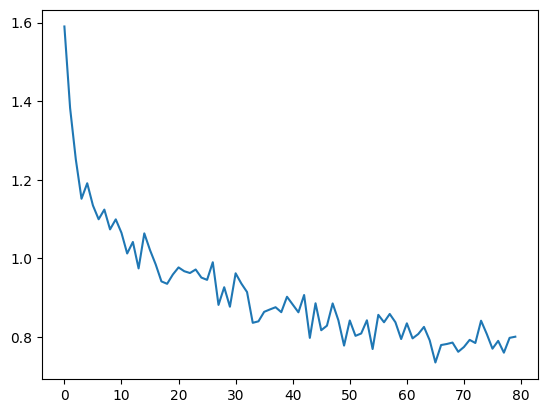

In [752]:
import matplotlib.pyplot as plt

# Crtamo grafik kretanja loss funkcije kroz iteracije
plt.figure()
plt.plot(all_losses)

###### Pikaz predikcije jednog nasumičnog imena

In [753]:
output = predict(line_to_tensor("Leonardo"))

In [754]:
output_to_category(output)

('spanish', 16)

###### Računamo tačnost modela

In [755]:
accuracy = evaluate(X_valid, y_valid)
accuracy

0.7471980074719801

### Zadatak: Analiza vremenske serije

Dat je skup podataka koji opisuje broj avio putnika na mesečnom nivou u periodu od januara 1949. do decembra 1960. Na osnovu godine i meseca potrebno je predvideti broj putnika u jedinicama od 1.000. Ovo je problem regresije. Drugim rečima, na osnovu broja putnika (u jedinicama od 1.000) u prethodnim mesecima, cilj je predvideti broj putnika u narednom mesecu. Skup podataka ima samo jednu osobinu: Broj putnika.

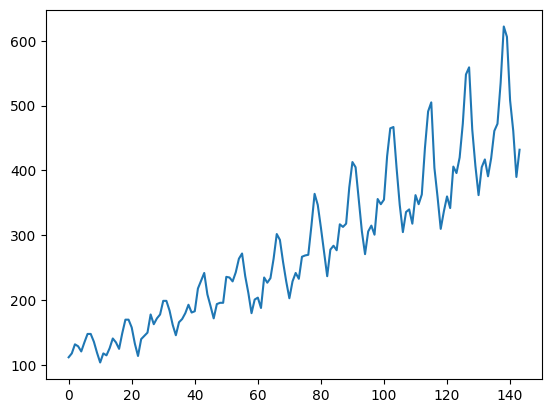

In [757]:
import pandas as pd
df = pd.read_csv('data/airline-passengers.csv')
timeseries = df[["Passengers"]].values.astype('float32')

plt.plot(timeseries)
plt.show()

Data vam je pomoćna funkcija koja kreira sekvence sa *lookback* brojem elemenata. Na primer, ukoliko želite da gledate 3 meseca unazad, stavićete da lookback bude 3 i kao rezultat ćete dobiti niz primera sekvenci sa po 3 elementa.

In [761]:
def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i + lookback]
        target = dataset[i + 1:i + lookback + 1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [764]:
# prikazujemo samo prvi primer
create_dataset(timeseries, 3)[0]

tensor([[[112.],
         [118.],
         [132.]],

        [[118.],
         [132.],
         [129.]],

        [[132.],
         [129.],
         [121.]],

        [[129.],
         [121.],
         [135.]],

        [[121.],
         [135.],
         [148.]],

        [[135.],
         [148.],
         [148.]],

        [[148.],
         [148.],
         [136.]],

        [[148.],
         [136.],
         [119.]],

        [[136.],
         [119.],
         [104.]],

        [[119.],
         [104.],
         [118.]],

        [[104.],
         [118.],
         [115.]],

        [[118.],
         [115.],
         [126.]],

        [[115.],
         [126.],
         [141.]],

        [[126.],
         [141.],
         [135.]],

        [[141.],
         [135.],
         [125.]],

        [[135.],
         [125.],
         [149.]],

        [[125.],
         [149.],
         [170.]],

        [[149.],
         [170.],
         [170.]],

        [[170.],
         [170.],
         [15

## Zadatak
Napraviti model mašinskog učenja koji na osnovu podataka iz data/train.csv predviđa zvanje

In [14]:
# Učitavanje podataka u dataframe pomoću pandas biblioteke

import pandas as pd 

df = pd.read_csv("./data/train.csv")

# Izbacivanje nedostajućih vrednosti ukoliko postoje
df = df.dropna()

Primetimo da se u datom skupu nalaze i kategorička obeležja.

Kako bismo mogli da treniramo naš model, potrebno je izvršiti transformaciju.

Neke od jednostavnijih opcija jesu Ordinal encoding i One-hot encoding.

***Ordinal encoding*** - Svaku kategoriju enkodira u numeričku vrednost na osnovu poretka. Koristimo kada postoji redosled u kategorijama.
Koristimo metodu `map()` da enkodiramo kolonu *zvanje*, jer postoji redosled u tim kategorijama.
Sličnu stvar radi i LabelEncoder, međutim tada će LabelEncoder sam odrediti poredak kategorija.

***One-hot encoding*** - Svaku kategoriju enkodira one-hot vektorom. One-hot vektor sadrži sve nule i jedinicu na poziciji koja predstavlja kategoriju (npr. [0, 0, 1, 0]). Koristimo kada ne postoji jasan redosled u kategorijama.
U ovom slučaju je udaljenost svakog vektora koji predstavlja kategoriju od koordinatnog početka 1, pa nije definisan poredak.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ordinal encoding
df['zvanje'] = df['zvanje'].map({'AsstProf': 0, 'Prof': 1, 'AssocProf': 2})

# One hot encoding
df = pd.get_dummies(df, columns=['oblast', 'pol'], drop_first=True)

train, test = train_test_split(df, test_size=0.3, random_state=42)


X_train = train.drop('zvanje', axis=1)
y_train = train['zvanje']

X_test = test.drop("zvanje", axis=1)
y_test = test['zvanje']

X_test.head() # prvih 5 redova test skup

,godina_doktor,godina_iskustva,plata,oblast_B,pol_Male
167,1,1,70768,True,True
211,31,28,122500,False,True
63,45,45,146856,True,True
154,36,38,151445,True,True
5,15,8,81500,False,True


Da bi modeli mašinskog učenja bolje radili poželjno je uradili standardizaciju ili normalizaciju.

Standardizacija predstavlja proces gde se izračunavaju srednja vrednost i standardna devijacija za svaku kolonu i zatim se od svih vrednosti u toj koloni oduzme srednja vrednost i podeli se sa standardnom devijacijom.
Ovako se dobijaju male vrednosti centrirane oko nule, što u praksi pomaže modelima da bolje uče.

In [16]:
st = StandardScaler()

# Obratiti pažnju na razliku između fit_transform i transform!
X_train[X_train.columns] = st.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = st.transform(X_test[X_test.columns])

X_train.head() # prvih 5 redova test skup

,godina_doktor,godina_iskustva,plata,oblast_B,pol_Male
266,1.541769,0.643432,-0.383261,-1.044466,0.353553
37,1.003580,1.102973,-0.461970,0.957427,0.353553
16,0.696043,0.720022,0.277010,-1.044466,0.353553
253,-1.379829,-1.118143,-1.358231,-1.044466,0.353553
144,-0.687872,-0.735192,0.564568,0.957427,0.353553


U ovom trenutku podaci su spremni za trening.

Sada je potrebno da izaberemo model i da ga treniramo.

U pitanju je problem klasifikacije, pa ćemo u nastavku kreirati ANN u torch-u.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score # Import koji ćemo koristiti za izračunavanje krajnje metrike

torch.manual_seed(42) # za reproducibilnost

# Ukoliko pravimo model u torch-u, potrebno je pretvoriti vrednosti u tensore
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Pravimo jednostavan model za klasifikaciju
class MLPClassifier(nn.Module):

    def __init__(self, input_size, hidden_sizes, num_classes):
        super().__init__()
        self.relu = nn.ReLU()
        sizes = [input_size] + hidden_sizes + [num_classes]
        self.layers = nn.ModuleList([nn.Linear(sizes[i - 1], sizes[i]) for i in range(1, len(sizes))])

    def forward(self, x):
        out = x
        for i, layer in enumerate(self.layers):
            out = layer(out)
            if i < len(self.layers) - 1:
                out = self.relu(out)
        return out


input_size = X_train.shape[1]
hidden_sizes = [64, 32] # Ovde možete eksperimentisati sa različitim brojevima neurona po sloju
num_classes = 3 # Broj jedinstvenih klasa
model = MLPClassifier(input_size, hidden_sizes, num_classes)

criterion = nn.CrossEntropyLoss() # loss funkcija za klasifikaciju kao i do sad
optimizer = optim.Adam(model.parameters(), lr=0.05)

# Trening petlja
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluacija
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    f1 = f1_score(y_pred=predicted, y_true=y_test, average='micro')
    print(f'F1: {f1}')

Epoch 100/1000, Loss: 0.0042
Epoch 200/1000, Loss: 0.0003
Epoch 300/1000, Loss: 0.0001
Epoch 400/1000, Loss: 0.0001
Epoch 500/1000, Loss: 0.0000
Epoch 600/1000, Loss: 0.0000
Epoch 700/1000, Loss: 0.0000
Epoch 800/1000, Loss: 0.0000
Epoch 900/1000, Loss: 0.0000
Epoch 1000/1000, Loss: 0.0000
F1: 0.8777777777777778


## Zadatak
Napraviti model mašinskog učenja koji na osnovu podataka iz data/south_park_train.csv predviđa koji karakter izgovara rečenicu.
U nastavku ćemo napraviti dva modela (Naivni Bajes i neuronsku mrežu) i uporediti ih. Na kolokvijumu je dosta da napravite jedan model.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Učitavanje podataka i enkodovanje labela (Cartman - 1, Stan - 2 ...)
df = pd.read_csv('./data/south_park_train.csv')
df = df.dropna()
df['Character'] = LabelEncoder().fit_transform(df['Character'])

df.head()

,Season,Episode,Character,Line
0,5,4,1,"Oh, nothing. No big deal, really.\n"
1,2,4,8,Naturally.\n
2,5,5,1,"Kyle, none of this would be happening if you h..."
3,16,9,8,"You find a good catcher's mitt, Cartman?\n"
4,11,14,10,This is a nice surprise. I thought you were ne...


Radi jednostavnosti, koristićemo samo kolonu Line kao ulaz, a kao izlaz kolonu Character.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df['Line'], df['Character'], test_size=0.2, random_state=42)
X_train.head()

14477                           Here! Here's the phone! \n
20011                     So he's a Hillary Clinton fan.\n
9529     Dude, Kyle. Can you hear me? They totally thin...
14101    Kewl, thanks Kyle. Oh, and Kyle... Happy Passo...
17436                                             Jesus!\n
Name: Line, dtype: object

## Pretprocesiranje teksta
Kolona "Line" u našem skupu podataka sadrži samo tekstualne rečenice iz serije "South Park". Da bismo ove rečenice mogli koristiti kao ulaz za naš model mašinskog učenja, trebamo ih pretvoriti u numeričke vektore. Setimo se Naivnog Bajesa i Bag-of-words metode.
Prebrojaćemo sve reči iz teksta i napraviti rečnik. Svaka rečenica postaje vektor iste dužine, gde svaka reč u rečniku dobija svoj indeks, a vrednost predstavlja broj pojavljivanja te reči u datoj rečenici. Pošto ima ~11.000 jedinstvenih reči, vektor svake rečenice biće vektor dimenzije ~11.000.

Da bismo prebrojali reči, možemo ručno iskodiradi rečnik, ili koristiti ugrađenu klasu iz scikit-learn paketa. `CountVectorizer` je alat iz `scikit-learn` paketa koji pretvara tekstualne podatke u matricu brojeva reči (bag-of-words). On kreira vokabular iz skupa podataka, a zatim broji pojavljivanja svake reči u svakom dokumentu.

Kada smo pričali o koracima preprocesiranja teksta, spominjali smo između ostalog:
1. Transformacija u mala slova, 
2. Izbacivanje znakova interpukcije,
3. Uklanjanje stop reči (Reči koje se često izbacuju iz rečenica prilikom rada sa tekstom jer ne nose neku semantiku).

`CountVectorizer` već to radi automatski za nas. 
parametri za CountVectorizer:
  - stop_words - Reči koje se često izbacuju iz rečenica prilikom rada sa tekstom jer ne nose neku semantiku
  - ngram_range - Torka u kojoj vrednosti predstavljaju minimalan i maksimalan broj reči koje će biti dodate u rečnik.
  
Pogledajmo kod:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(stop_words="english")

# Ponovo obratiti pažnju na razliku fit_transform i transform
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

In [4]:
# pogledajmo kako izgleda naučeni rečnik
bow.vocabulary_

{'phone': 7542,
 'hillary': 4849,
 'clinton': 1972,
 'fan': 3635,
 'dude': 3134,
 'kyle': 5736,
 'hear': 4703,
 'totally': 10469,
 'think': 10279,
 'hotter': 5005,
 'attractive': 678,
 'kewl': 5635,
 'thanks': 10247,
 'oh': 7062,
 'happy': 4629,
 'passover': 7403,
 'jesus': 5484,
 'come': 2056,
 'boys': 1288,
 'holdin': 4914,
 'bus': 1459,
 'wow': 11435,
 'look': 6043,
 'kenny': 5626,
 'thank': 10245,
 'wonderful': 11382,
 'concert': 2155,
 'mr': 6715,
 'went': 11210,
 'just': 5583,
 'gay': 4185,
 'video': 10960,
 'earth': 3197,
 'years': 11541,
 'ago': 311,
 'closed': 1983,
 'country': 2329,
 'kitchen': 5686,
 'buffet': 1397,
 'steamboat': 9734,
 'springs': 9605,
 'old': 7099,
 'people': 7472,
 'died': 2819,
 'starvation': 9707,
 'week': 11186,
 'save': 8787,
 'little': 5994,
 'brother': 1364,
 'send': 8951,
 'away': 728,
 'parents': 7376,
 'senses': 8958,
 'ike': 5168,
 'cover': 2345,
 'll': 6003,
 'place': 7628,
 'hide': 4830,
 'don': 2990,
 'wanna': 11100,
 'cartman': 1619,
 've': 

Jednom kada smo pretprocesirali tekst, pravimo model Naivnog Bajesa. Umesto da ručno pišemo kod, koristimo ugrađenu klasu.

In [5]:
# Biramo model, npr. Naivni Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)

# evaluiramo model
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')

Accuracy: 0.41272794938593227


Umesto prostog Naivnog Bajesa možemo koristiti napredniji model kao što je neuronska mreža.

In [6]:
# Ili npr. ANN klasifikator
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MLPClassifier, self).__init__()
        self.relu = nn.ReLU()
        sizes = [input_size] + hidden_sizes + [num_classes]
        self.layers = nn.ModuleList([nn.Linear(sizes[i - 1], sizes[i]) for i in range(1, len(sizes))])

    def forward(self, x):
        out = x
        for i, layer in enumerate(self.layers):
            out = layer(out)
            if i < len(self.layers) - 1:
                out = self.relu(out)
        return out

input_size = X_train.shape[1]
hidden_sizes = [512, 256, 128] # Ovde možete eksperimentisati sa različitim brojevima neurona po sloju
num_classes = len(set(y_train)) # Broj jedinstvenih klasa
model = MLPClassifier(input_size, hidden_sizes, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)

# Treniranje modela
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Evaluacija
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_pred=predicted, y_true=y_test)
    print(f'Accuracy: {accuracy}')

Epoch 10/100, Loss: 2.2017345428466797
Epoch 20/100, Loss: 1.8360216617584229
Epoch 30/100, Loss: 1.5487442016601562
Epoch 40/100, Loss: 1.3408933877944946
Epoch 50/100, Loss: 1.1214064359664917
Epoch 60/100, Loss: 0.9292271137237549
Epoch 70/100, Loss: 0.7997066974639893
Epoch 80/100, Loss: 0.6989333629608154
Epoch 90/100, Loss: 0.6172363758087158
Epoch 100/100, Loss: 0.5471173524856567
Accuracy: 0.39151470040937847


Porazmislite da li smo mogli još bolje da preprocesiramo tekst? Da li smo mogli da napravimo bolji model?

Za one koje žele da nauče više (nije neophodno za kolokvijum):
- Iz torchtext.vocab možete importovati GloVe
- Umesto da imamo odgromnu dimenziju ulaznih vektora, dobijamo drugačiju reprezentaciju teksta (embedinge fiksne dužine).